In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import HeatMap


%matplotlib inline

In [ ]:
file_path = '/content/drive/MyDrive/cxc_data/wildfire_data_for_visualization.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Display the dataset's basic information
print(df.info())

# Display statistics for numerical columns
print(df.describe())

# Display the number of missing values in each column
print(df.isnull().sum())
# Display column names
print(df.columns)


   fire_year fire_name      fire_start_date      discovered_date  \
0       2021   Unnamed  2010-06-28 09:07:00  2021-06-28 16:43:00   
1       2021   Unnamed  2020-03-25 08:00:00                  NaN   
2       2021   Unnamed  2020-04-16 16:20:00  2021-04-16 16:30:00   
3       2021   Unnamed  2020-04-16 17:00:00                  NaN   
4       2021   Unnamed  2020-11-01 10:00:00                  NaN   

         reported_date        dispatch_date  start_for_fire_date  \
0  2021-06-28 16:43:00  2021-06-28 16:44:00  2021-06-28 16:44:00   
1  2021-03-30 14:00:00  2021-03-30 14:31:00  2021-03-30 14:32:00   
2  2021-04-16 16:32:00  2021-04-16 16:33:00  2021-04-16 16:34:00   
3  2021-04-17 14:05:00  2021-04-17 14:20:00  2021-04-17 14:30:00   
4  2021-04-01 15:06:00  2021-04-01 15:11:00  2021-04-01 15:28:00   

   assessment_datetime first_bucket_drop_date ia_arrival_at_fire_date  ...  \
0  2021-06-28 16:44:00                    NaN     2021-06-28 16:43:00  ...   
1  2021-03-30 14:30:00    

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


fire_year                           0
fire_name                           0
fire_start_date                     3
discovered_date                  3978
reported_date                       1
dispatch_date                       6
start_for_fire_date                 7
assessment_datetime                 0
first_bucket_drop_date          16549
ia_arrival_at_fire_date          6527
fire_fighting_start_date         6417
bh_fs_date                          0
uc_fs_date                          0
ex_fs_date                          0
fire_start_month                    3
fire_start_weekday                  3
fire_start_part_of_day              0
fire_location_latitude              0
fire_location_longitude             0
fire_region                         0
current_size                        0
size_class                          0
fire_type                           0
fire_position_on_slope              0
fuel_type                           0
general_cause_desc                  0
true_cause  

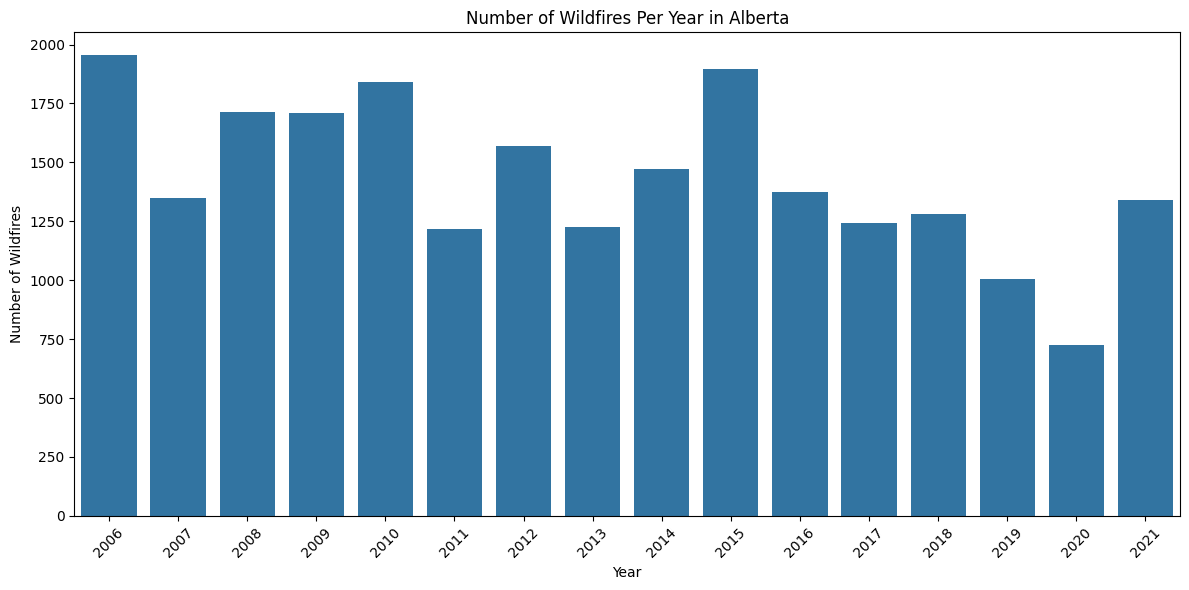

In [ ]:
# Plotting Number of Wildfires Per Year
plt.figure(figsize=(12, 6))
sns.countplot(x='fire_year', data=df)
plt.title('Number of Wildfires Per Year in Alberta')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-7-fef780cb3d94>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fire_start_month', palette='coolwarm')


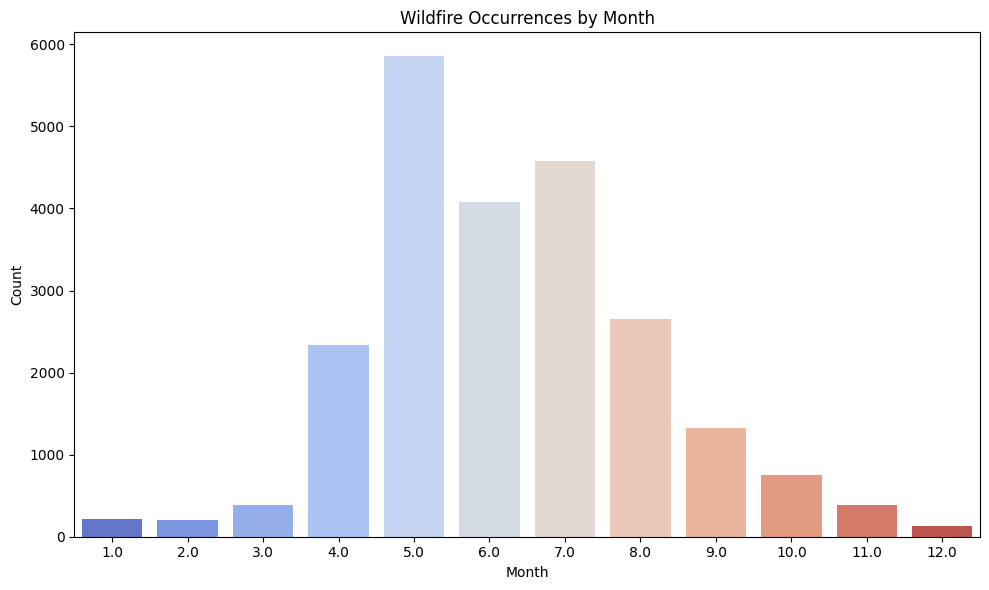

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fire_start_month', palette='coolwarm')
plt.title('Wildfire Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()


In [ ]:
# Sample the data if the dataset is too large to avoid browser crash
sample_df = df.sample(n=1000, random_state=1)
sample_df = df
max_lat, max_lon = sample_df['fire_location_latitude'].max(), sample_df['fire_location_longitude'].max()
min_lat, min_lon = sample_df['fire_location_latitude'].min(), sample_df['fire_location_longitude'].min()

# Create a map centered around the average location
map_center = [(max_lat + min_lat) / 2, (max_lon + min_lon) / 2]
fire_map = folium.Map(location=map_center, zoom_start=5)

# Add heat map layer
heat_data = [[row['fire_location_latitude'], row['fire_location_longitude']] for index, row in sample_df.iterrows()]
HeatMap(heat_data).add_to(fire_map)

fire_map  # Display the map

<ipython-input-9-06162f7e88a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fire_year', y='total_time_to_extinguish', palette='pastel')


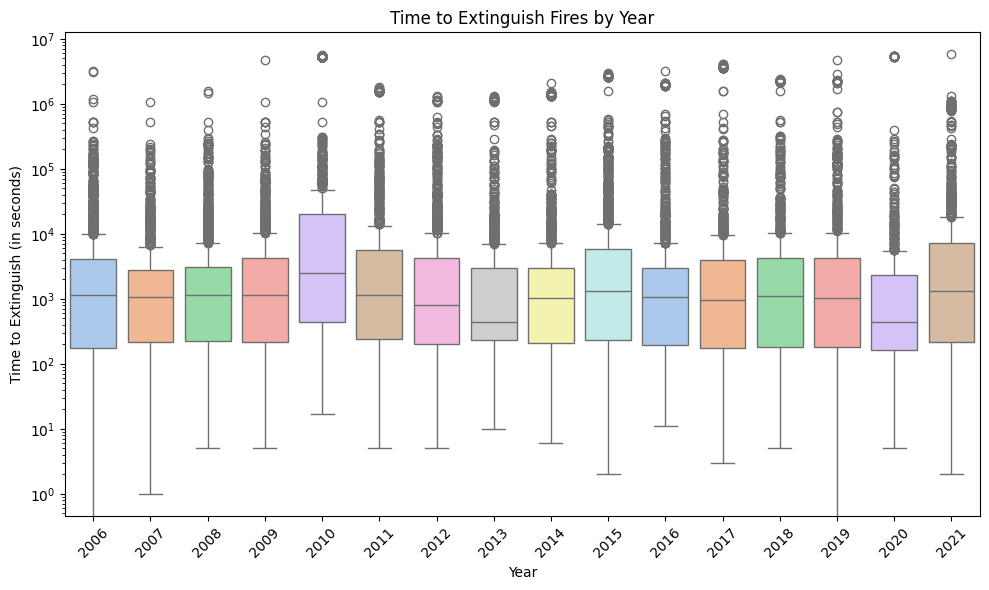

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fire_year', y='total_time_to_extinguish', palette='pastel')
plt.title('Time to Extinguish Fires by Year')
plt.xlabel('Year')
plt.ylabel('Time to Extinguish (in seconds)')
plt.xticks(rotation=45)
plt.yscale('log')  # Use log scale due to wide range of values
plt.tight_layout()


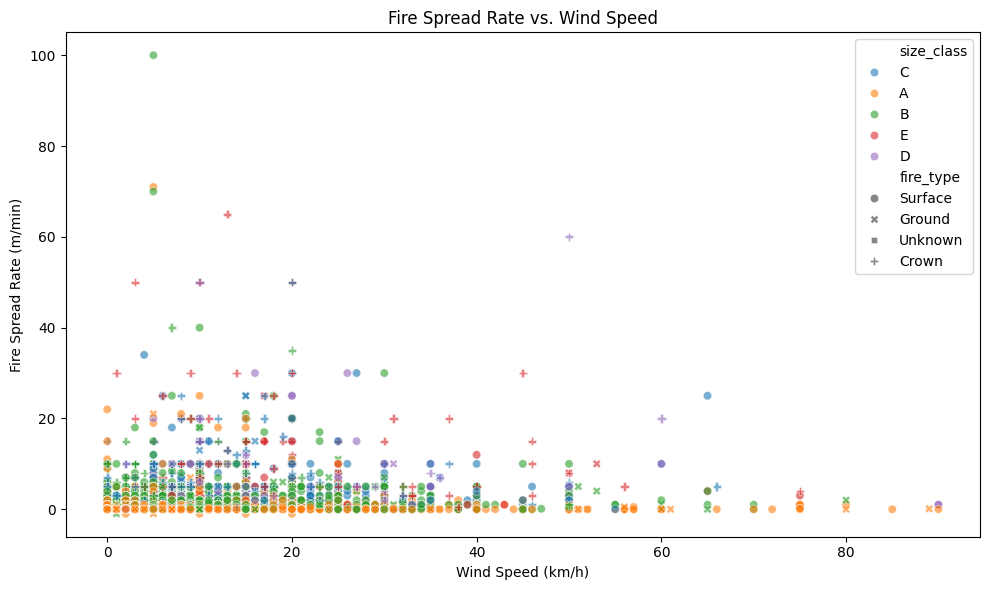

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='wind_speed', y='fire_spread_rate', hue='size_class', style='fire_type', alpha=0.6)
plt.title('Fire Spread Rate vs. Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Fire Spread Rate (m/min)')
plt.tight_layout()


<ipython-input-11-666e50340007>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='general_cause_desc', order=df['general_cause_desc'].value_counts().index, palette='tab10')


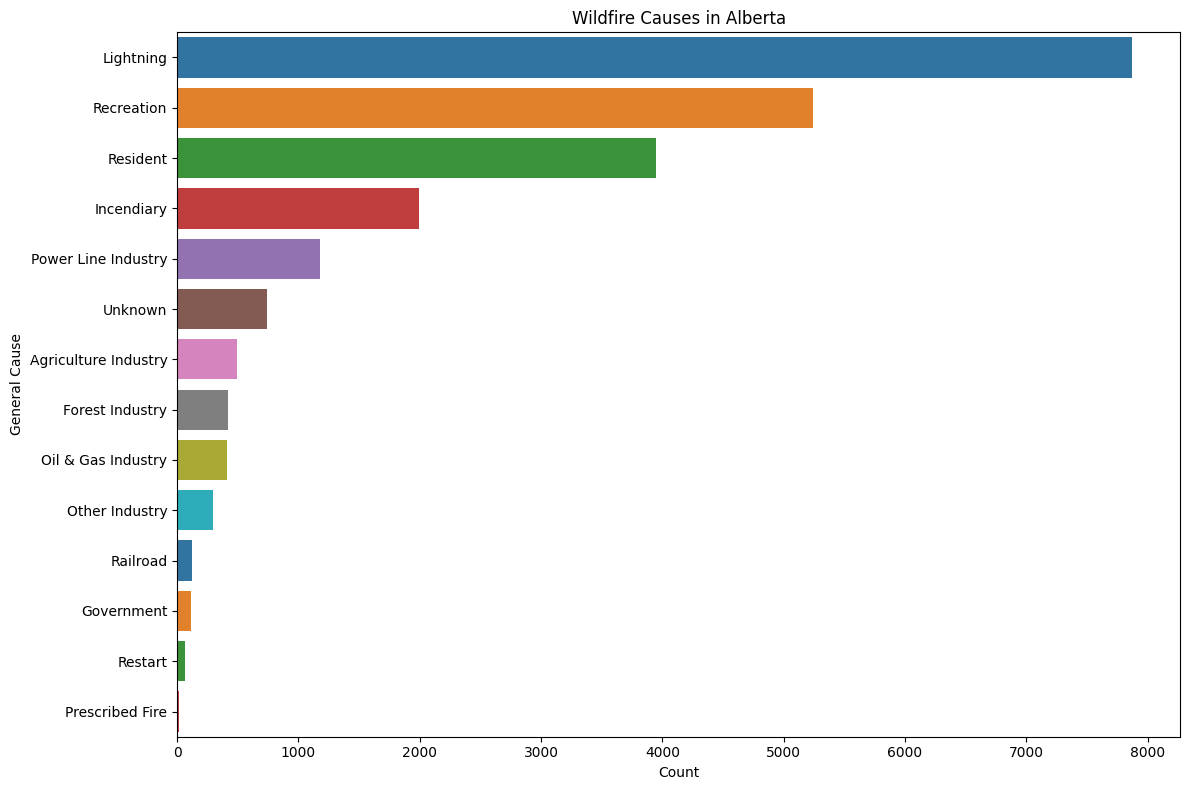

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='general_cause_desc', order=df['general_cause_desc'].value_counts().index, palette='tab10')
plt.title('Wildfire Causes in Alberta')
plt.xlabel('Count')
plt.ylabel('General Cause')
plt.tight_layout()

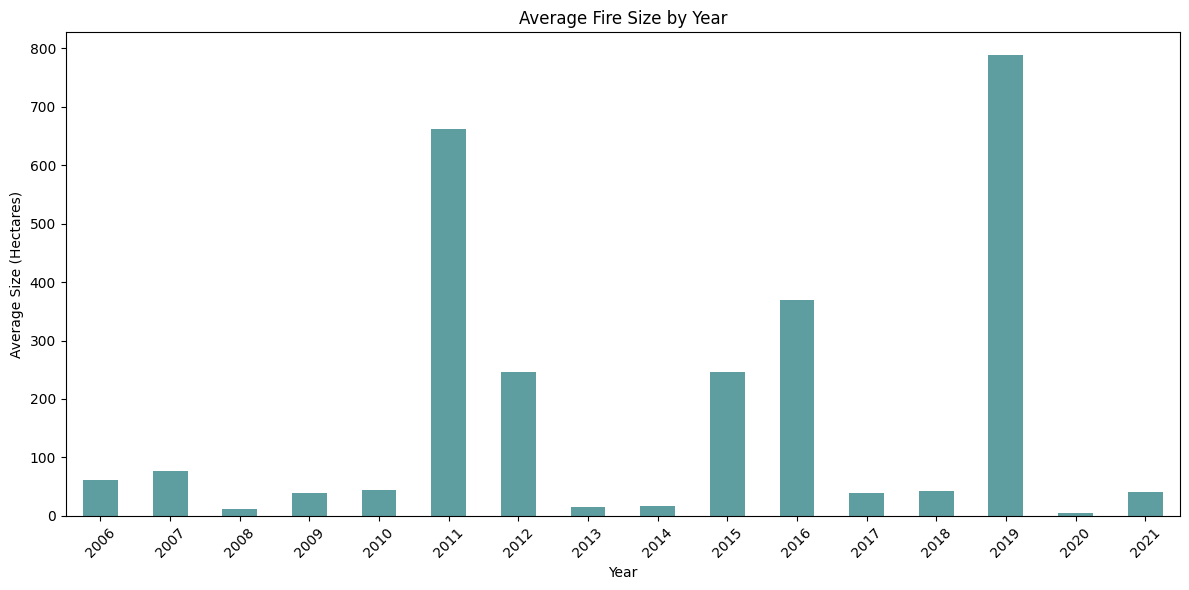

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby('fire_year')['current_size'].mean().plot(kind='bar', color='cadetblue')
plt.title('Average Fire Size by Year')
plt.xlabel('Year')
plt.ylabel('Average Size (Hectares)')
plt.xticks(rotation=45)
plt.tight_layout()


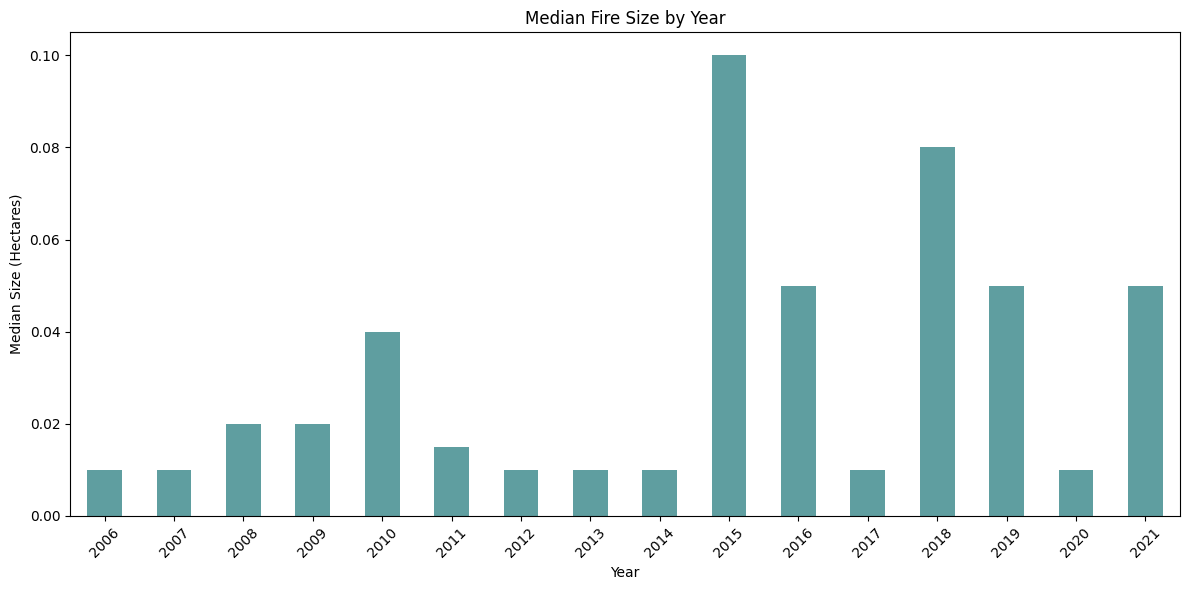

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby('fire_year')['current_size'].median().plot(kind='bar', color='cadetblue')
plt.title('Median Fire Size by Year')
plt.xlabel('Year')
plt.ylabel('Median Size (Hectares)')
plt.xticks(rotation=45)
plt.tight_layout()


<ipython-input-14-03eb5305ad6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='fire_type', order=df['fire_type'].value_counts().index, palette='Set2')


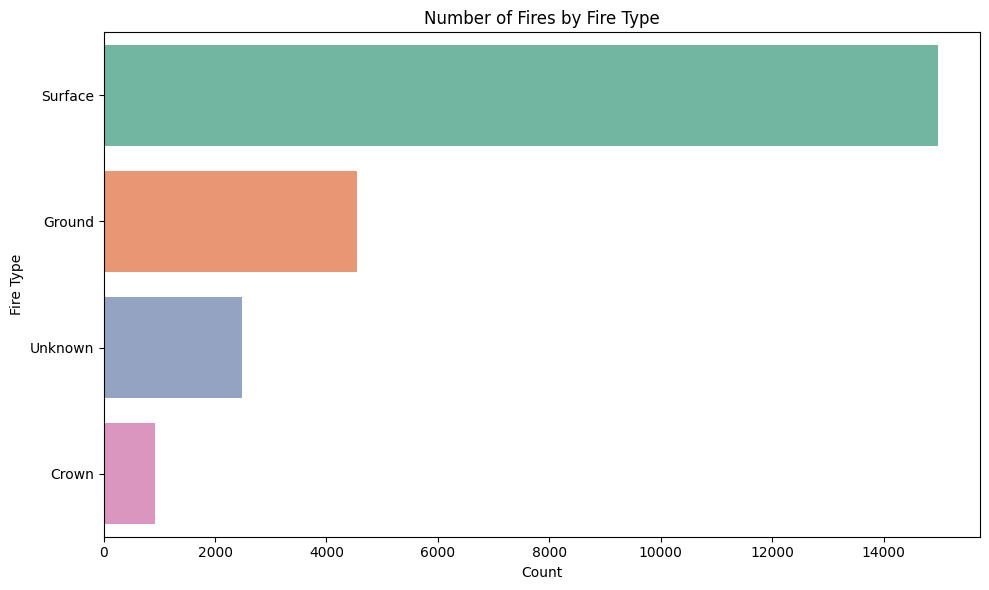

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='fire_type', order=df['fire_type'].value_counts().index, palette='Set2')
plt.title('Number of Fires by Fire Type')
plt.xlabel('Count')
plt.ylabel('Fire Type')
plt.tight_layout()


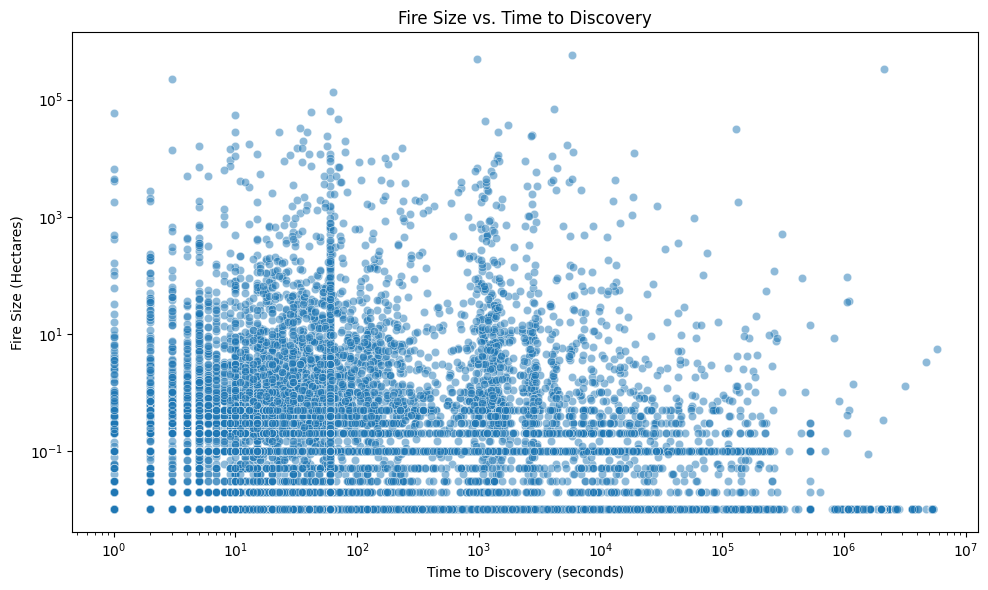

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='time_to_discovery', y='current_size', alpha=0.5)
plt.title('Fire Size vs. Time to Discovery')
plt.xlabel('Time to Discovery (seconds)')
plt.ylabel('Fire Size (Hectares)')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


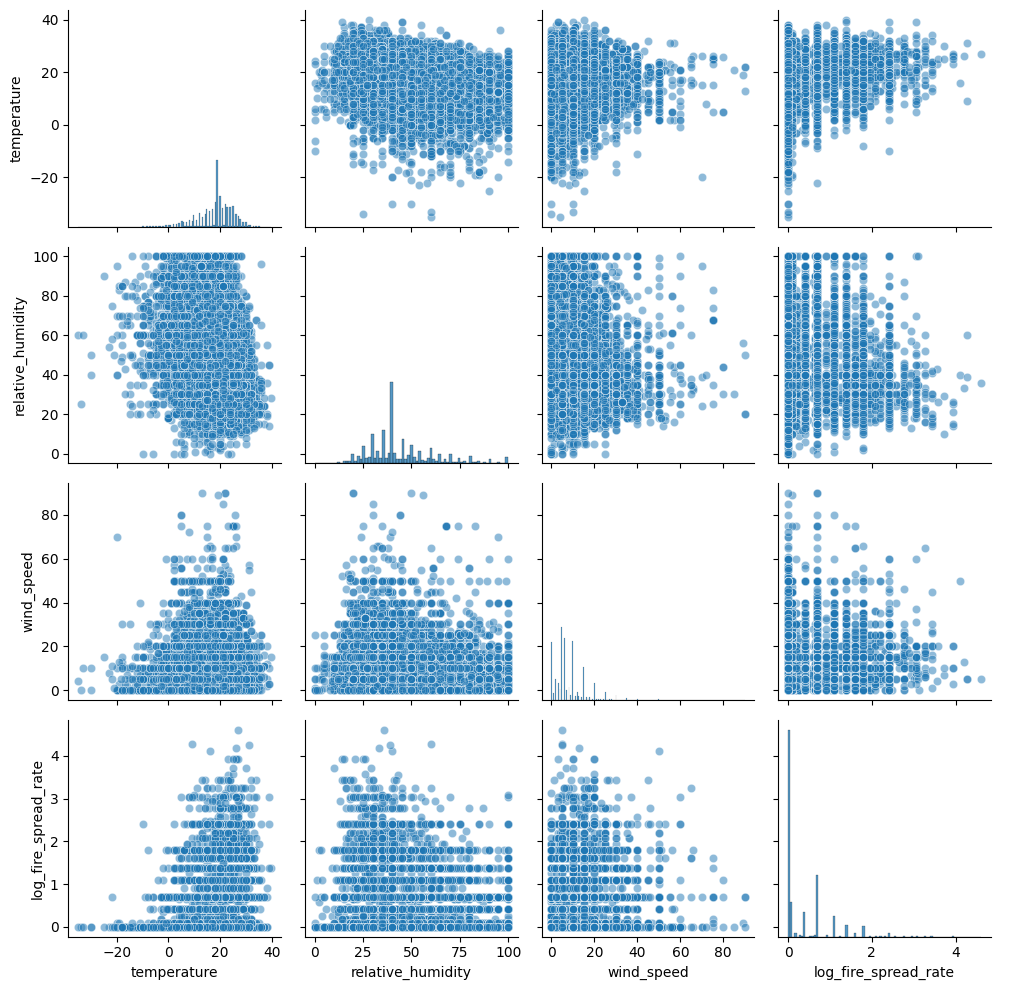

In [ ]:
df['log_fire_spread_rate'] = np.log1p(df['fire_spread_rate'])  # Log-transform for better visualization

g = sns.PairGrid(df, vars=['temperature', 'relative_humidity', 'wind_speed', 'log_fire_spread_rate'], dropna=True)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, alpha=0.5)
g.add_legend()
plt.tight_layout()


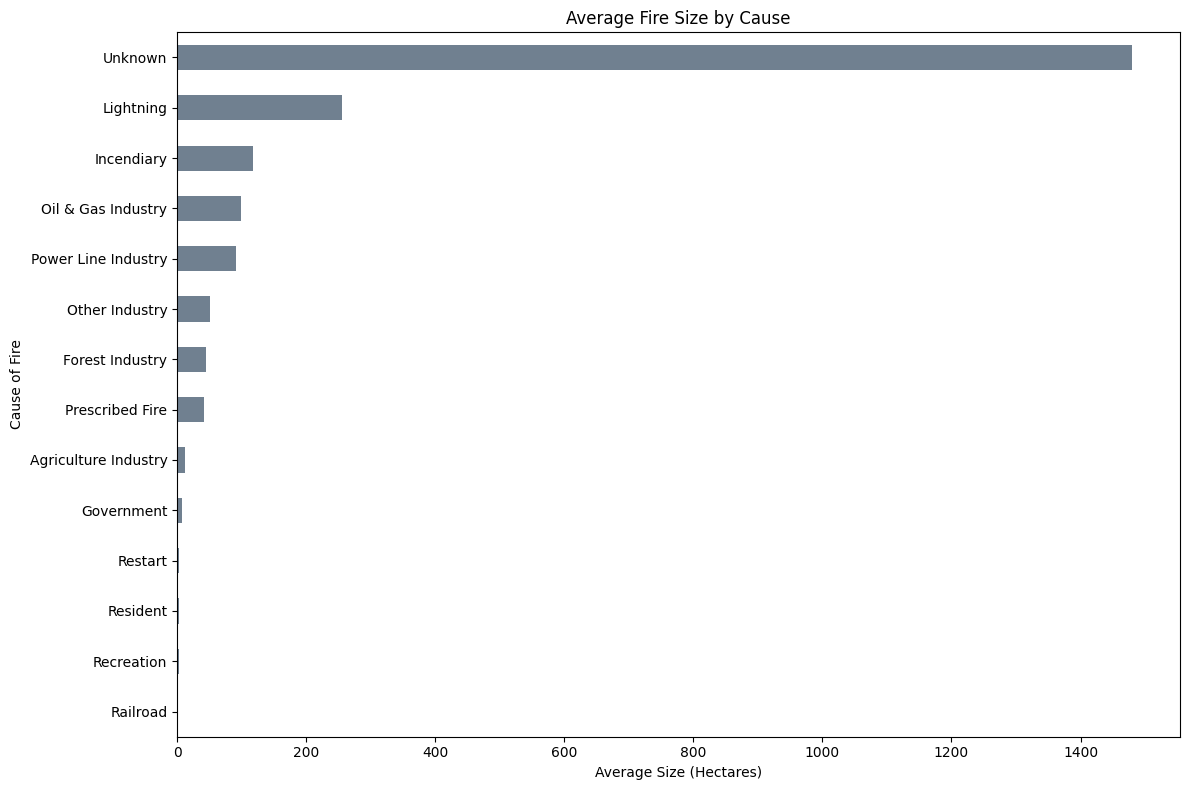

In [ ]:
plt.figure(figsize=(12, 8))
df.groupby('general_cause_desc')['current_size'].mean().sort_values().plot(kind='barh', color='slategray')
plt.title('Average Fire Size by Cause')
plt.xlabel('Average Size (Hectares)')
plt.ylabel('Cause of Fire')
plt.tight_layout()


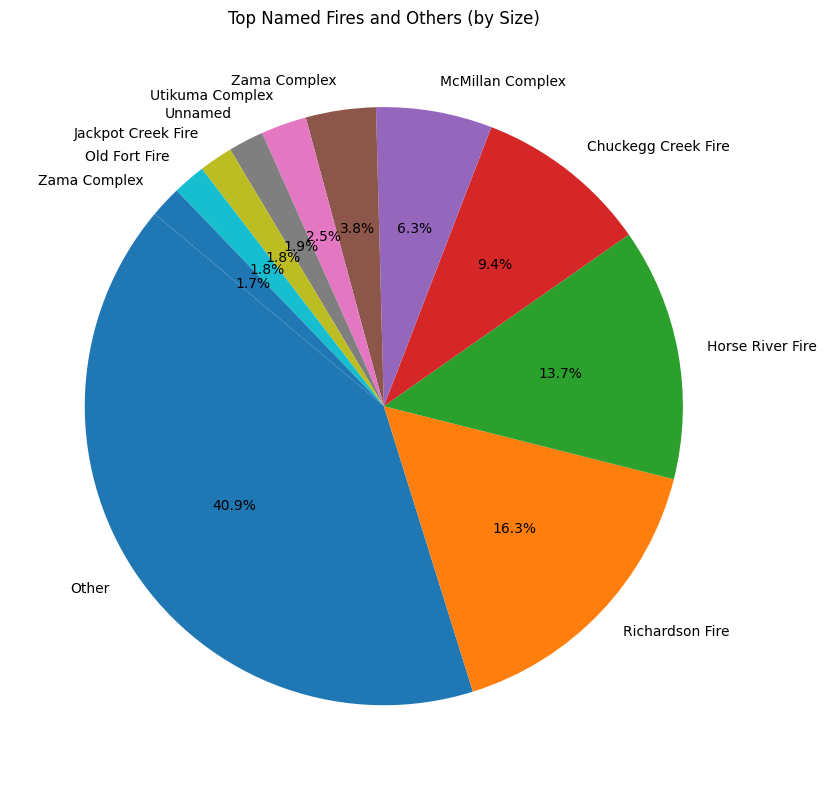

In [ ]:
# Define N, the number of top fires to consider
N = 10

# Filtering out rows where 'fire_name' is not provided or is considered unnamed
named_fires_only = df[df['fire_name'].notna() & (df['fire_name'] != '')]

# Sort the named fires by 'current_size' and take the top N rows
top_named_fires = named_fires_only.sort_values(by='current_size', ascending=False).head(N)

# Calculate the size of all other fires, including unnamed and those not in the top N
other_size = df[df.index.isin(top_named_fires.index) == False]['current_size'].sum()

# Prepare the data for plotting, adding an "Other" category for the rest of the fires
plot_data = top_named_fires[['fire_name', 'current_size']].copy()
other_data = pd.DataFrame([['Other', other_size]], columns=['fire_name', 'current_size'])
plot_data = pd.concat([plot_data, other_data], ignore_index=True)

# Sorting to ensure "Other" is correctly positioned if you need to
plot_data = plot_data.sort_values(by='current_size', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(plot_data['current_size'], labels=plot_data['fire_name'], autopct='%1.1f%%', startangle=140)
plt.title('Top Named Fires and Others (by Size)')
plt.tight_layout()
plt.show()


<ipython-input-19-00c8ea683692>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='fire_region', order=df['fire_region'].value_counts().index, palette='rocket')


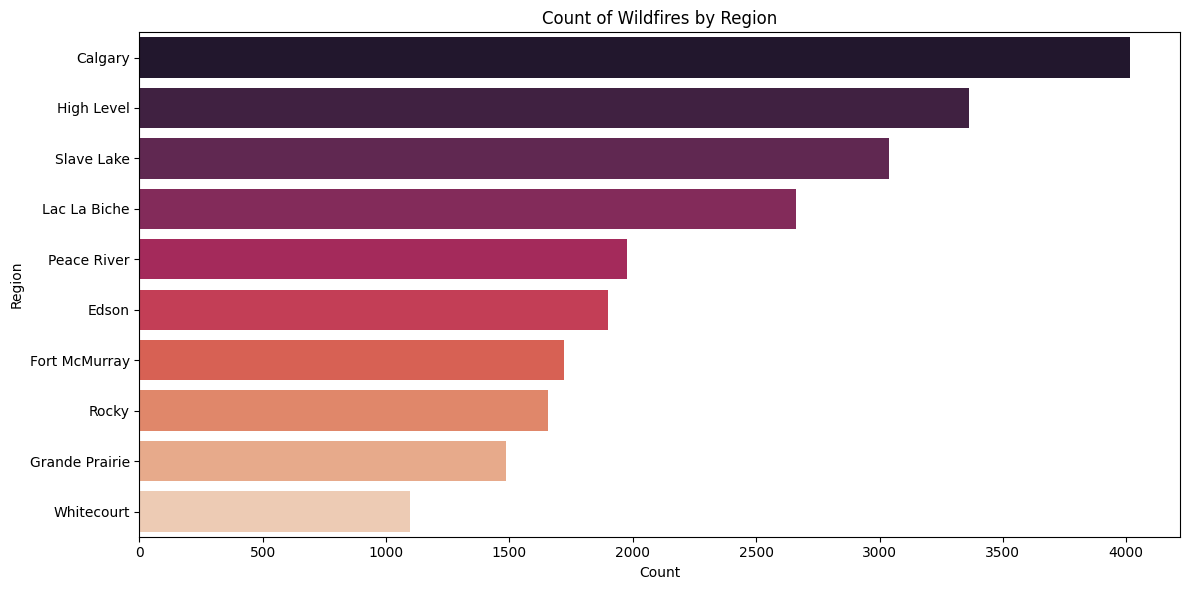

In [ ]:
# Count of Fires by Region
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='fire_region', order=df['fire_region'].value_counts().index, palette='rocket')
plt.title('Count of Wildfires by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


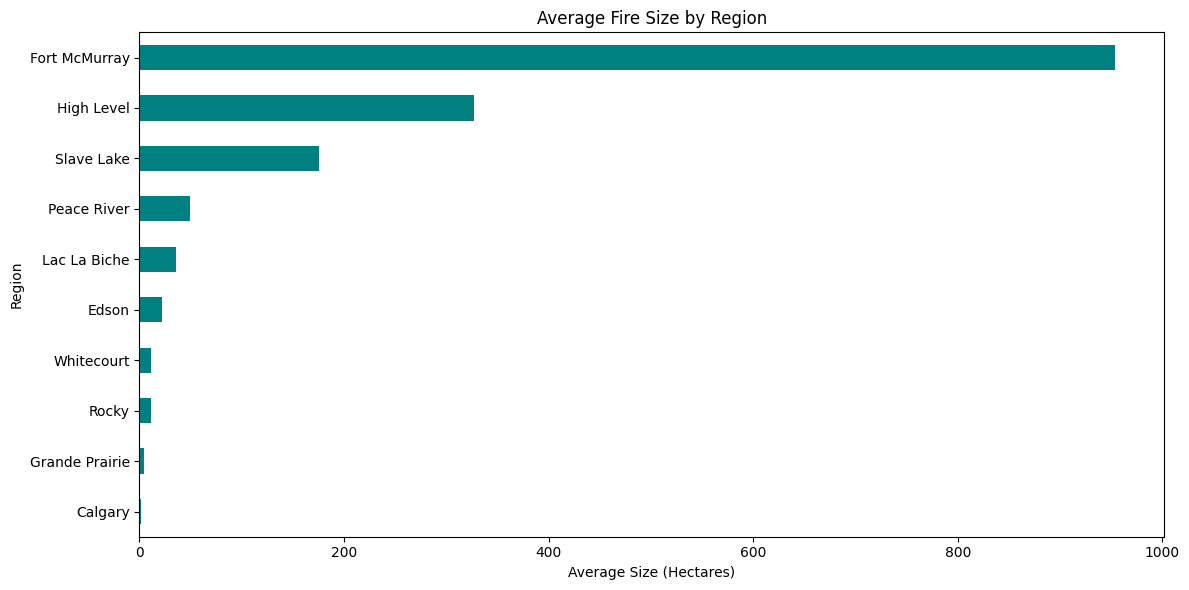

In [ ]:

# Average Fire Size by Region
plt.figure(figsize=(12, 6))
df.groupby('fire_region')['current_size'].mean().sort_values().plot(kind='barh', color='teal')
plt.title('Average Fire Size by Region')
plt.xlabel('Average Size (Hectares)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


<ipython-input-21-d88c14f40e10>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='fire_year', y='time_to_discovery_hrs', estimator='mean', ci=None, marker='o')


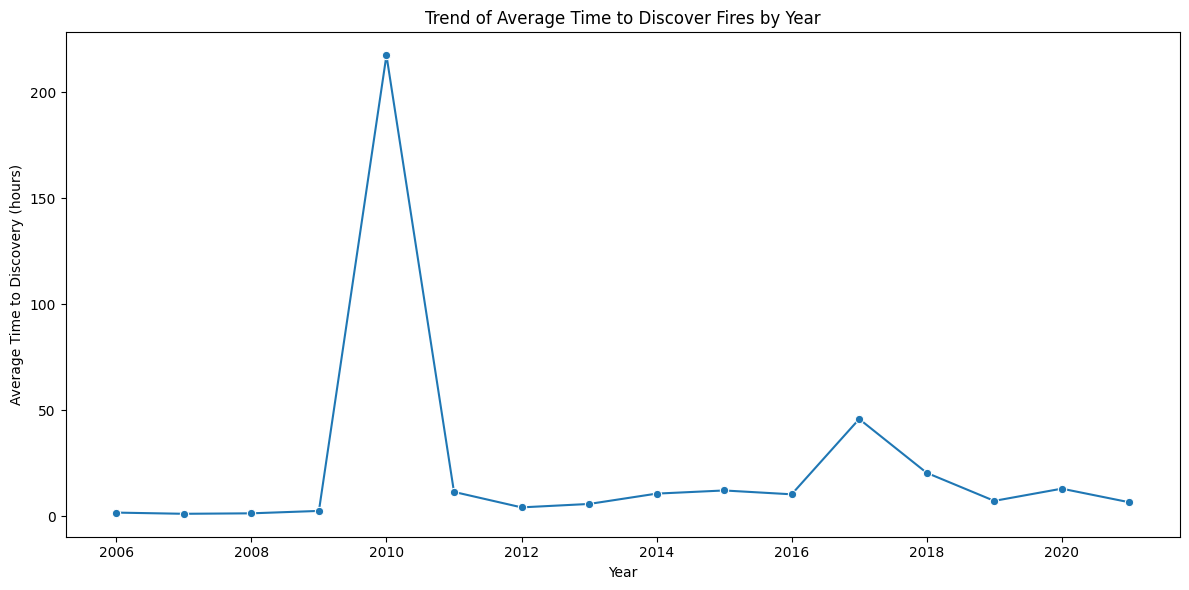

In [ ]:
# Convert time_to_discovery from seconds to hours for easier interpretation
df['time_to_discovery_hrs'] = df['time_to_discovery'] / 3600

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='fire_year', y='time_to_discovery_hrs', estimator='mean', ci=None, marker='o')
plt.title('Trend of Average Time to Discover Fires by Year')
plt.xlabel('Year')
plt.ylabel('Average Time to Discovery (hours)')
plt.tight_layout()
plt.show()


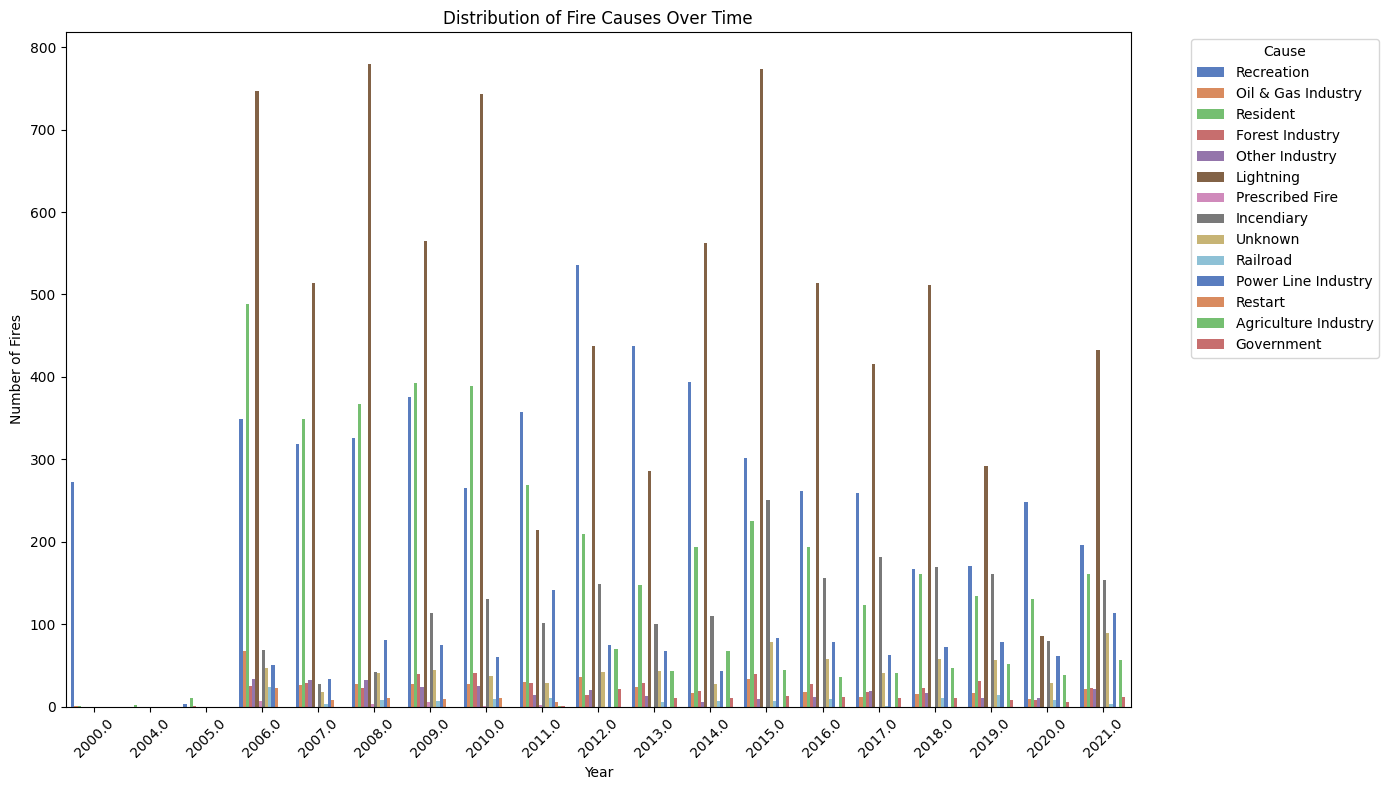

In [ ]:
# Assuming 'general_cause_desc' contains categorical descriptions of causes
plt.figure(figsize=(14, 8))
df['fire_year'] = pd.to_datetime(df['fire_start_date']).dt.year  # Ensure fire_year is correctly formatted
sns.countplot(data=df, x='fire_year', hue='general_cause_desc', palette='muted')
plt.title('Distribution of Fire Causes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


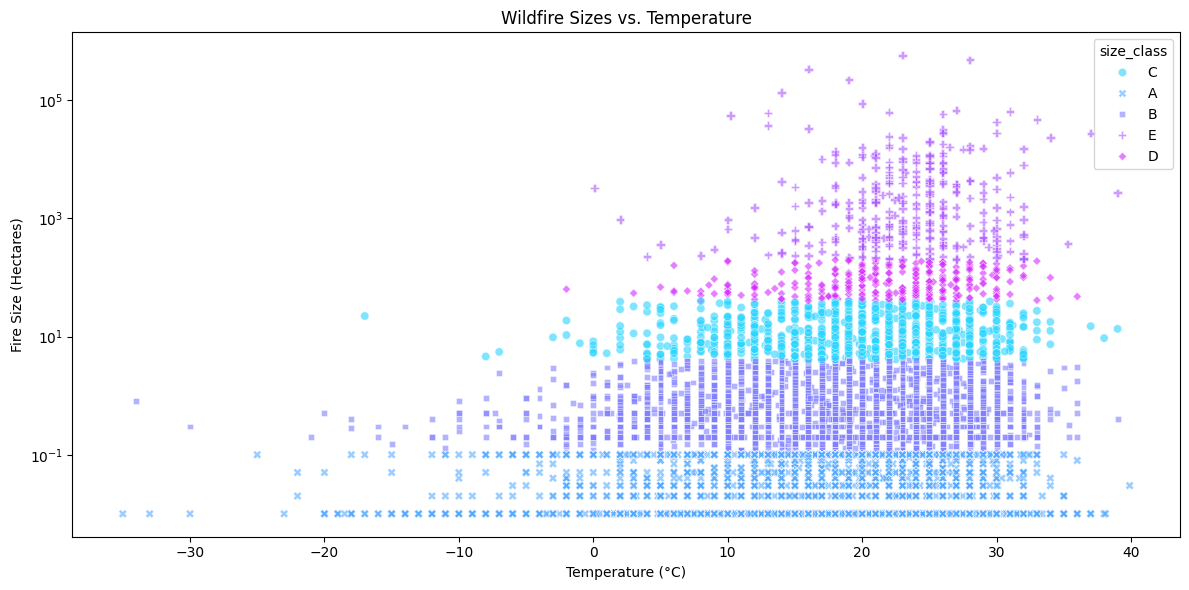

In [ ]:
# Scatter plot of Fire Size vs. Temperature, colored by Fire Size Class
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='temperature', y='current_size', hue='size_class', style='size_class', palette='cool', alpha=0.6)
plt.title('Wildfire Sizes vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fire Size (Hectares)')
plt.yscale('log')  # Log scale for size due to large range
plt.tight_layout()
plt.show()


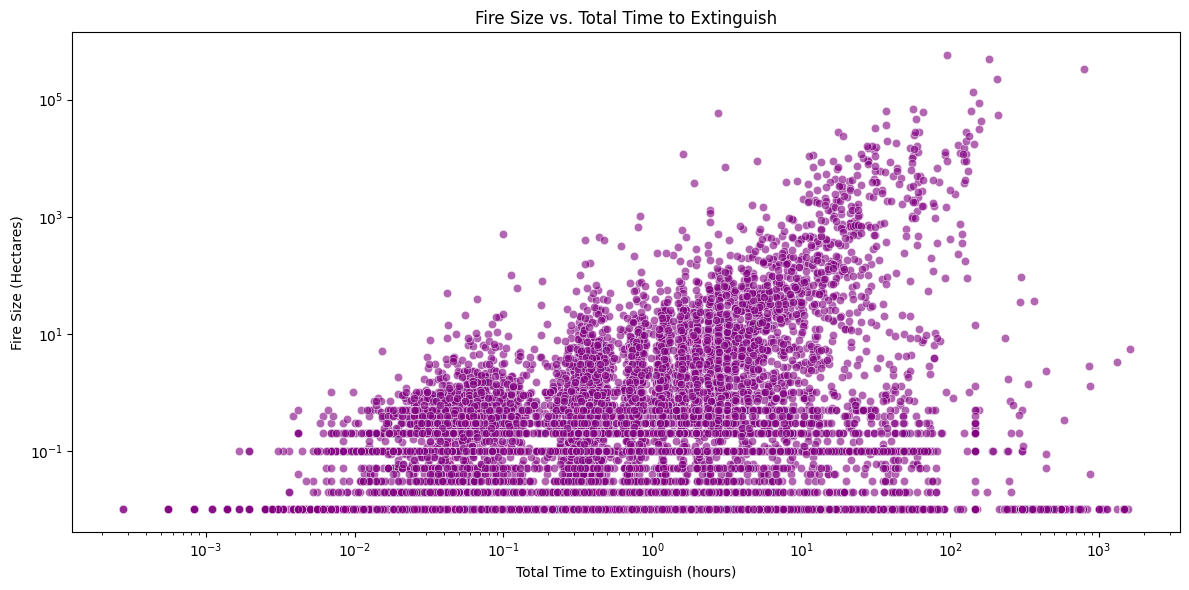

In [ ]:
# Scatter plot of Fire Size vs. Total Time to Extinguish
plt.figure(figsize=(12, 6))
df['total_time_to_extinguish_hrs'] = df['total_time_to_extinguish'] / 3600  # Convert seconds to hours
sns.scatterplot(data=df, x='total_time_to_extinguish_hrs', y='current_size', alpha=0.6, color='purple')
plt.title('Fire Size vs. Total Time to Extinguish')
plt.xlabel('Total Time to Extinguish (hours)')
plt.ylabel('Fire Size (Hectares)')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['fire_year', 'fire_name', 'fire_start_date', 'discovered_date',
       'reported_date', 'dispatch_date', 'start_for_fire_date',
       'assessment_datetime', 'first_bucket_drop_date',
       'ia_arrival_at_fire_date', 'fire_fighting_start_date', 'bh_fs_date',
       'uc_fs_date', 'ex_fs_date', 'fire_start_month', 'fire_start_weekday',
       'fire_start_part_of_day', 'fire_location_latitude',
       'fire_location_longitude', 'fire_region', 'current_size', 'size_class',
       'fire_type', 'fire_position_on_slope', 'fuel_type',
       'general_cause_desc', 'true_cause', 'det_agent', 'det_agent_type',
       'industry_identifier_desc', 'responsible_group_desc', 'activity_class',
       'weather_conditions_over_fire', 'temperature', 'relative_humidity',
       'wind_speed', 'fire_spread_rate', 'initial_action_by',
       'dispatched_resource', 'assessment_resource', 'ia_access',
       'bucketing_on_fire', 'distance_from_water_source',
       'assessment_hectares', 'bh_hectares', 

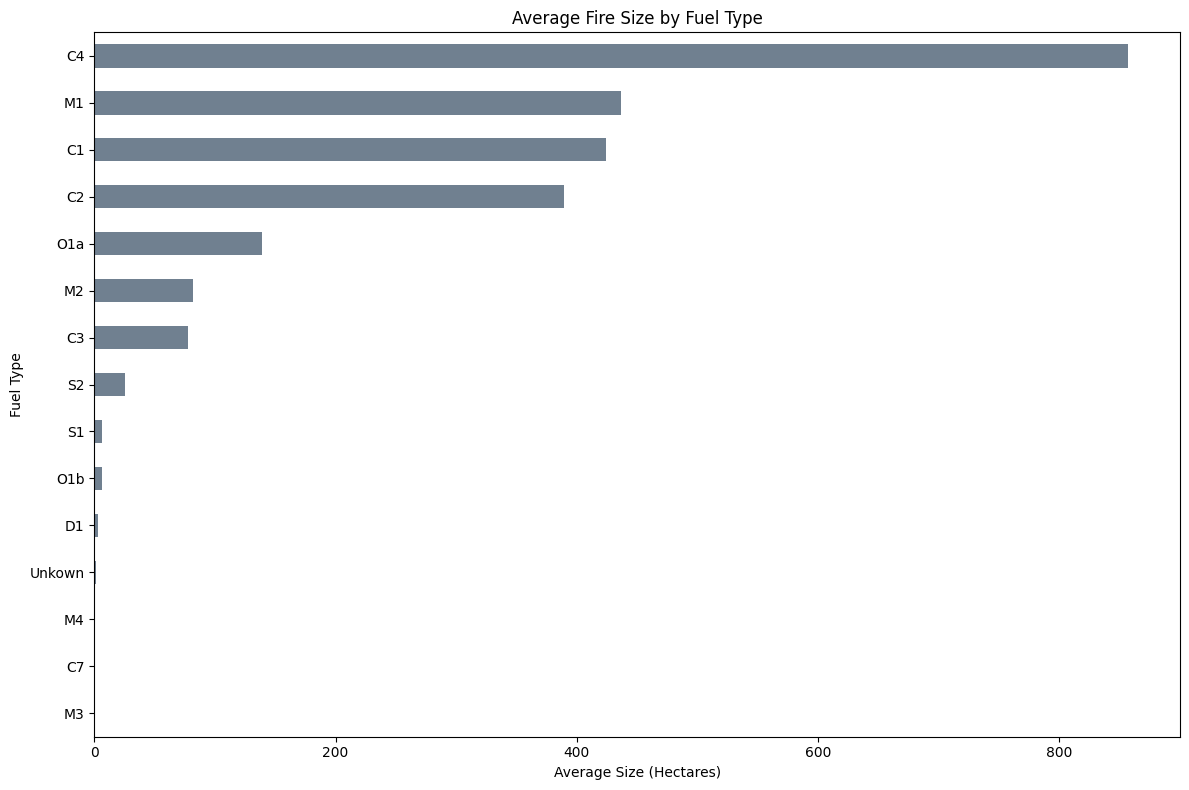

In [ ]:
plt.figure(figsize=(12, 8))
df.groupby('fuel_type')['current_size'].mean().sort_values().plot(kind='barh', color='slategray')
plt.title('Average Fire Size by Fuel Type')
plt.xlabel('Average Size (Hectares)')
plt.ylabel('Fuel Type')
plt.tight_layout()


In [ ]:
file_path = '/content/drive/MyDrive/cxc_data/lfsa000b16a_e.shp'
fsa_boundaries = gpd.read_file(file_path)
fsa_boundaries = fsa_boundaries[fsa_boundaries["PRNAME"] == "Alberta"]
fsa_boundaries = fsa_boundaries.reset_index(drop=True)
fsa_boundaries

CFSAUID PRUID   PRNAME                                           geometry
0       T5G    48  Alberta  POLYGON ((4816310.637 2172400.929, 4816342.500...
1       T5T    48  Alberta  POLYGON ((4807391.077 2166500.049, 4807561.400...
2       T5V    48  Alberta  POLYGON ((4807192.440 2174396.717, 4807188.774...
3       T5W    48  Alberta  POLYGON ((4821992.651 2170087.949, 4822454.000...
4       T4B    48  Alberta  MULTIPOLYGON (((4711959.574 1945558.637, 47116...
..      ...   ...      ...                                                ...
148     T6B    48  Alberta  POLYGON ((4821122.691 2165762.643, 4821109.631...
149     T6C    48  Alberta  POLYGON ((4816597.271 2167076.349, 4816616.463...
150     T6V    48  Alberta  POLYGON ((4813144.891 2179187.429, 4813373.231...
151     T6E    48  Alberta  POLYGON ((4814417.629 2166400.766, 4814423.611...
152     T6G    48  Alberta  POLYGON ((4812929.729 2165755.740, 4812894.614...

[153 rows x 4 columns]

In [ ]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.fire_location_longitude, df.fire_location_latitude),
    crs="EPSG:4326"
)

file_path = '/content/drive/MyDrive/cxc_data/lfsa000b16a_e.shp'
fsa_boundaries = gpd.read_file(file_path)
fsa_boundaries = fsa_boundaries[fsa_boundaries["PRNAME"] == "Alberta"]
fsa_boundaries = fsa_boundaries.to_crs("EPSG:4326")


In [ ]:
wildfires_with_fsa = gpd.sjoin(gdf, fsa_boundaries, how="left", predicate="within")
wildfires_with_fsa.head()


fire_year fire_name      fire_start_date      discovered_date  \
0     2010.0   Unnamed  2010-06-28 09:07:00  2021-06-28 16:43:00   
1     2020.0   Unnamed  2020-03-25 08:00:00                  NaN   
2     2020.0   Unnamed  2020-04-16 16:20:00  2021-04-16 16:30:00   
3     2020.0   Unnamed  2020-04-16 17:00:00                  NaN   
4     2020.0   Unnamed  2020-11-01 10:00:00                  NaN   

         reported_date        dispatch_date  start_for_fire_date  \
0  2021-06-28 16:43:00  2021-06-28 16:44:00  2021-06-28 16:44:00   
1  2021-03-30 14:00:00  2021-03-30 14:31:00  2021-03-30 14:32:00   
2  2021-04-16 16:32:00  2021-04-16 16:33:00  2021-04-16 16:34:00   
3  2021-04-17 14:05:00  2021-04-17 14:20:00  2021-04-17 14:30:00   
4  2021-04-01 15:06:00  2021-04-01 15:11:00  2021-04-01 15:28:00   

   assessment_datetime first_bucket_drop_date ia_arrival_at_fire_date  ...  \
0  2021-06-28 16:44:00                    NaN     2021-06-28 16:43:00  ...   
1  2021-03-30 14:30:00                    NaN                     NaN  ...   
2  2021-04-16 16:50:00                    NaN     2021-04-16 16:48:00  ...   
3  2021-04-17 15:20:00                    NaN                     NaN  ...   
4  2021-04-01 16:29:00                    NaN                     NaN  ...   

  time_to_first_bucket_drop total_time_to_extinguish log_fire_spread_rate  \
0                     137.0                5790517.0             1.386294   
1                     137.0                 547230.0             0.000000   
2                     137.0                 526915.0             0.405465   
3                     137.0                 526944.0             0.000000   
4                     137.0                 233550.0             1.791759   

  time_to_discovery_hrs  total_time_to_extinguish_hrs  \
0           1607.326667                   1608.476944   
1              0.016667                    152.008333   
2            146.002778                    146.365278   
3              0.016667                    146.373333   
4              0.016667                     64.875000   

                      geometry index_right  CFSAUID  PRUID   PRNAME  
0  POINT (-119.92697 59.52214)      1379.0      T0H     48  Alberta  
1  POINT (-116.11896 52.69226)      1383.0      T0M     48  Alberta  
2  POINT (-110.71995 55.93705)      1271.0      T0P     48  Alberta  
3  POINT (-111.16075 56.42593)      1442.0      T9H     48  Alberta  
4  POINT (-116.05863 53.69345)      1393.0      T7E     48  Alberta  

[5 rows x 64 columns]

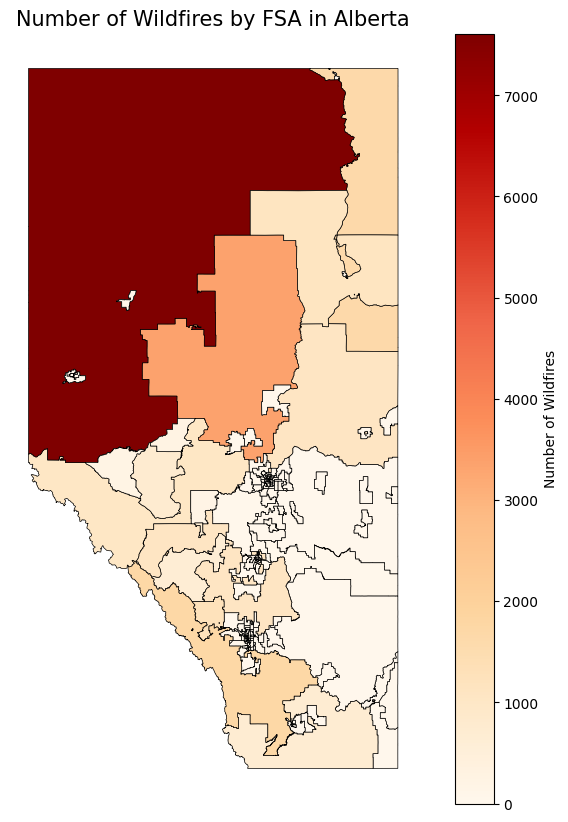

In [ ]:
# Aggregate total wildfires per FSA and plot
wildfire_counts_by_fsa = wildfires_with_fsa.groupby('CFSAUID').size().reset_index(name='wildfire_count')

fsa_boundaries_with_counts = fsa_boundaries.merge(wildfire_counts_by_fsa, on='CFSAUID', how='left')
fsa_boundaries_with_counts['wildfire_count'] = fsa_boundaries_with_counts['wildfire_count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotting FSA boundaries colored by wildfire count
fsa_boundaries_with_counts.plot(column='wildfire_count', ax=ax, legend=True,
                                legend_kwds={'label': "Number of Wildfires"},
                                cmap='OrRd', edgecolor='black', linewidth=0.5)

# Customize the plot
ax.set_title('Number of Wildfires by FSA in Alberta', fontsize=15)
ax.set_axis_off()  # Optional: Removes axis for a cleaner map

plt.show()

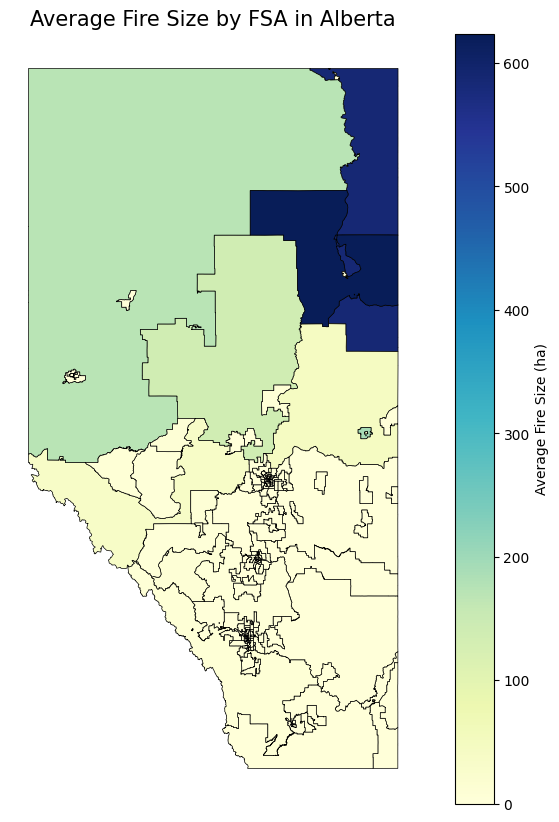

In [ ]:
# Calculate average fire size by FSA
average_fire_size_by_fsa = wildfires_with_fsa.groupby('CFSAUID')['current_size'].mean().reset_index(name='average_fire_size')

# Merge with FSA boundaries
fsa_boundaries_with_avg_size = fsa_boundaries.merge(average_fire_size_by_fsa, on='CFSAUID', how='left')
fsa_boundaries_with_avg_size['average_fire_size'] = fsa_boundaries_with_avg_size['average_fire_size'].fillna(0)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

fsa_boundaries_with_avg_size.plot(column='average_fire_size', ax=ax, legend=True,
                                  legend_kwds={'label': "Average Fire Size (ha)"},
                                  cmap='YlGnBu', edgecolor='black', linewidth=0.5)
ax.set_title('Average Fire Size by FSA in Alberta', fontsize=15)
ax.set_axis_off()
plt.show()


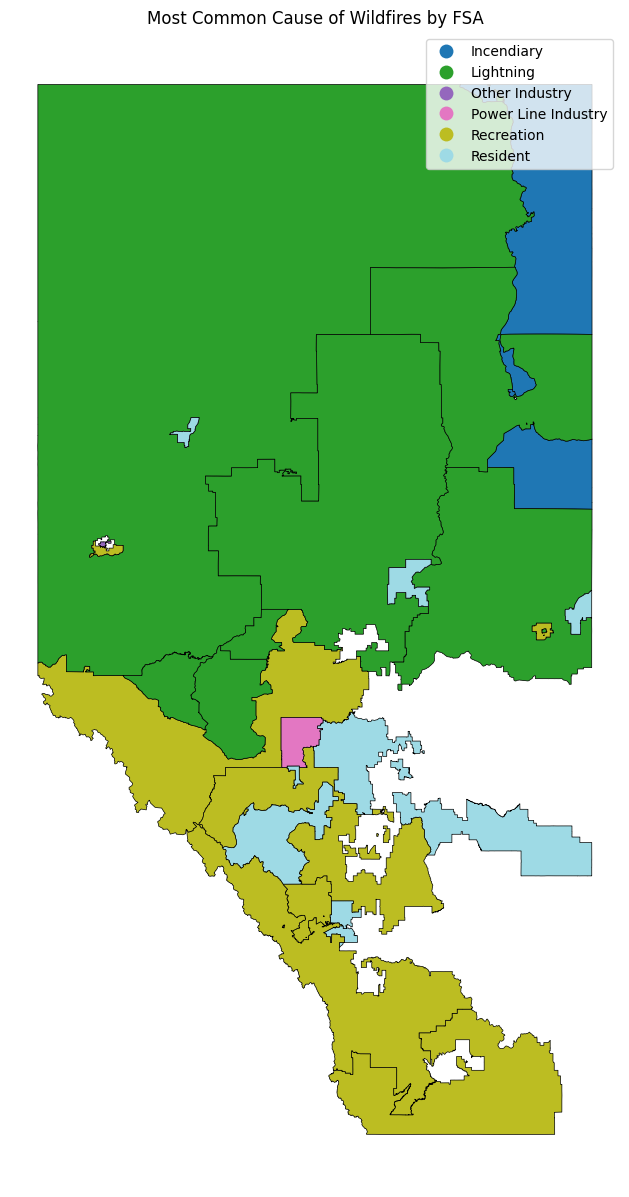

In [ ]:
# First, determine the most frequent cause of wildfires in each FSA
most_common_cause = wildfires_with_fsa.groupby('CFSAUID')['general_cause_desc'].agg(lambda x: x.mode()[0]).reset_index()

# Merge this data with the FSA boundaries
fsa_boundaries_with_cause = fsa_boundaries.merge(most_common_cause, on='CFSAUID', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
# Plot
fsa_boundaries_with_cause.plot(column='general_cause_desc', cmap='tab20', legend=True,
                               edgecolor='black', linewidth=0.5, ax=ax)

plt.title('Most Common Cause of Wildfires by FSA')
plt.axis('off')
plt.show()


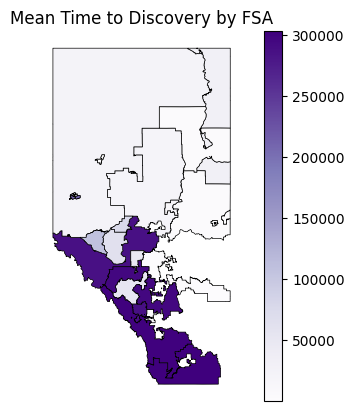

In [ ]:
# Calculate mean time to discovery for each FSA
mean_discovery_time_by_fsa = wildfires_with_fsa.groupby('CFSAUID')['time_to_discovery'].mean().reset_index()

# Merge with FSA boundaries
fsa_boundaries_with_discovery_time = fsa_boundaries.merge(mean_discovery_time_by_fsa, on='CFSAUID', how='left')

# Plot
fsa_boundaries_with_discovery_time.plot(column='time_to_discovery', cmap='Purples', legend=True,
                                        edgecolor='black', linewidth=0.5)
plt.title('Mean Time to Discovery by FSA')
plt.axis('off')
plt.show()


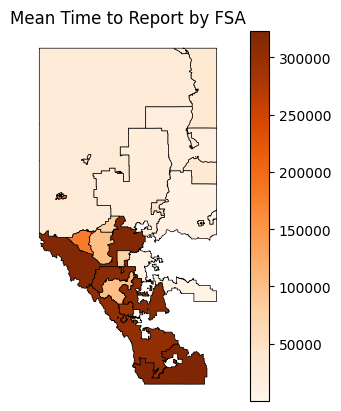

In [ ]:
# Calculate Mean time to report for each FSA
mean_report_time_by_fsa = wildfires_with_fsa.groupby('CFSAUID')['time_to_report'].mean().reset_index()

# Merge with FSA boundaries
fsa_boundaries_with_report_time = fsa_boundaries.merge(mean_report_time_by_fsa, on='CFSAUID', how='left')

# Plot
fsa_boundaries_with_report_time.plot(column='time_to_report', cmap='Oranges', legend=True,
                                     edgecolor='black', linewidth=0.5)
plt.title('Mean Time to Report by FSA')
plt.axis('off')
plt.show()


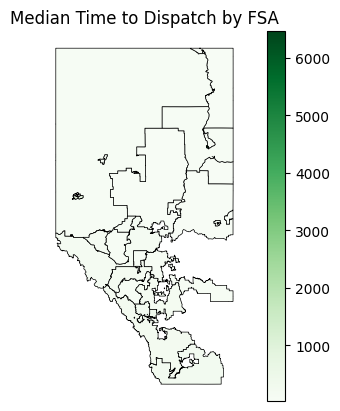

In [ ]:
# Calculate median time to dispatch for each FSA
median_dispatch_time_by_fsa = wildfires_with_fsa.groupby('CFSAUID')['time_to_dispatch'].median().reset_index()

# Merge with FSA boundaries
fsa_boundaries_with_dispatch_time = fsa_boundaries.merge(median_dispatch_time_by_fsa, on='CFSAUID', how='left')

# Plot
fsa_boundaries_with_dispatch_time.plot(column='time_to_dispatch', cmap='Greens', legend=True,
                                       edgecolor='black', linewidth=0.5)
plt.title('Median Time to Dispatch by FSA')
plt.axis('off')
plt.show()


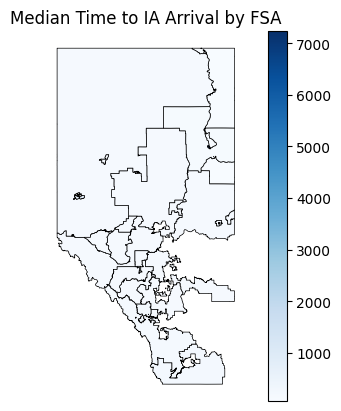

In [ ]:
# Calculate median time to IA arrival for each FSA
median_ia_arrival_time_by_fsa = wildfires_with_fsa.groupby('CFSAUID')['time_to_ia_arrival'].median().reset_index()

# Merge with FSA boundaries
fsa_boundaries_with_ia_arrival_time = fsa_boundaries.merge(median_ia_arrival_time_by_fsa, on='CFSAUID', how='left')

# Plot
fsa_boundaries_with_ia_arrival_time.plot(column='time_to_ia_arrival', cmap='Blues', legend=True,
                                         edgecolor='black', linewidth=0.5)
plt.title('Median Time to IA Arrival by FSA')
plt.axis('off')
plt.show()


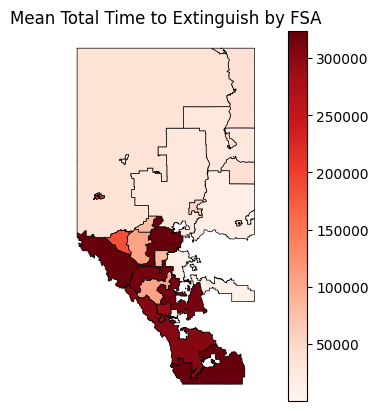

In [ ]:
# Calculate mean total time to extinguish for each FSA
mean_extinguish_time_by_fsa = wildfires_with_fsa.groupby('CFSAUID')['total_time_to_extinguish'].mean().reset_index()

# Merge with FSA boundaries
fsa_boundaries_with_extinguish_time = fsa_boundaries.merge(mean_extinguish_time_by_fsa, on='CFSAUID', how='left')

# Plot
fsa_boundaries_with_extinguish_time.plot(column='total_time_to_extinguish', cmap='Reds', legend=True,
                                         edgecolor='black', linewidth=0.5)
plt.title('Mean Total Time to Extinguish by FSA')
plt.axis('off')
plt.show()


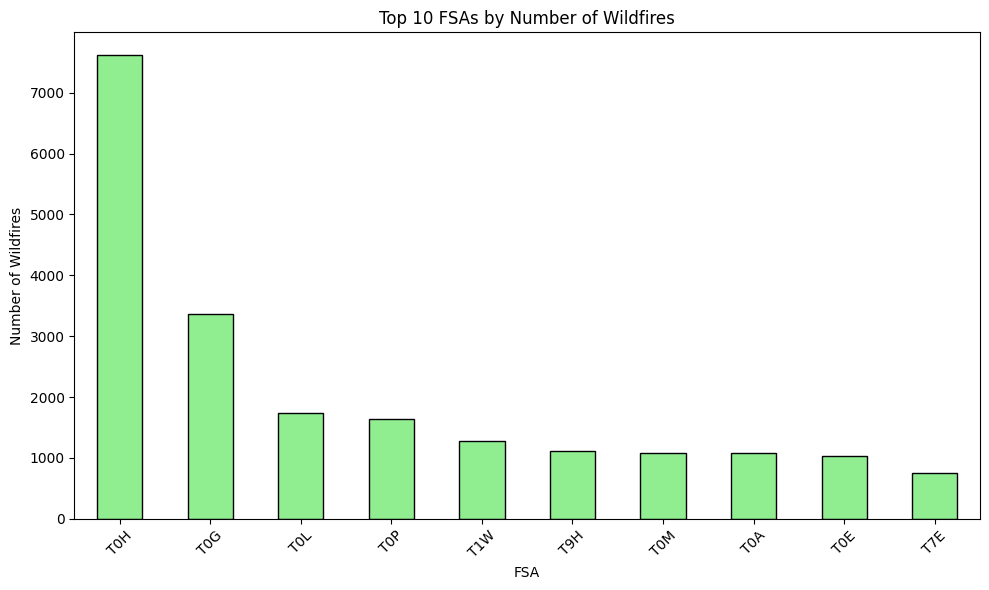

In [ ]:
top_fsas = wildfires_with_fsa['CFSAUID'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_fsas.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 FSAs by Number of Wildfires')
plt.xlabel('FSA')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


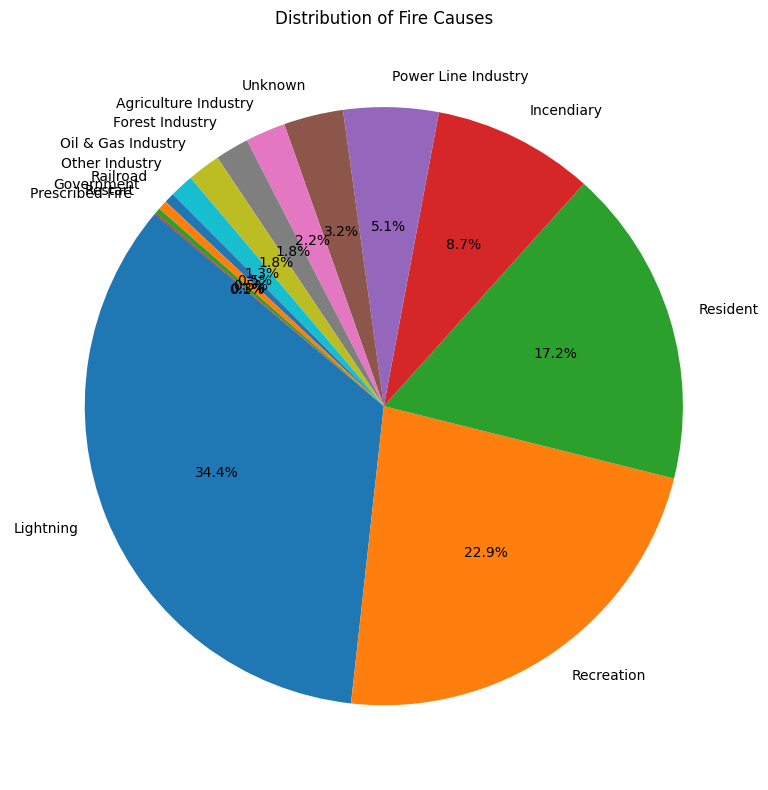

In [ ]:
fire_causes = wildfires_with_fsa['general_cause_desc'].value_counts()

plt.figure(figsize=(10, 8))
fire_causes.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fire Causes')
plt.ylabel('')  # Hide the y-label as it's unnecessary for a pie chart
plt.tight_layout()
plt.show()


<ipython-input-40-a8bb0df3c3d8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_size_by_type, x='fire_type', y='current_size', palette='coolwarm')


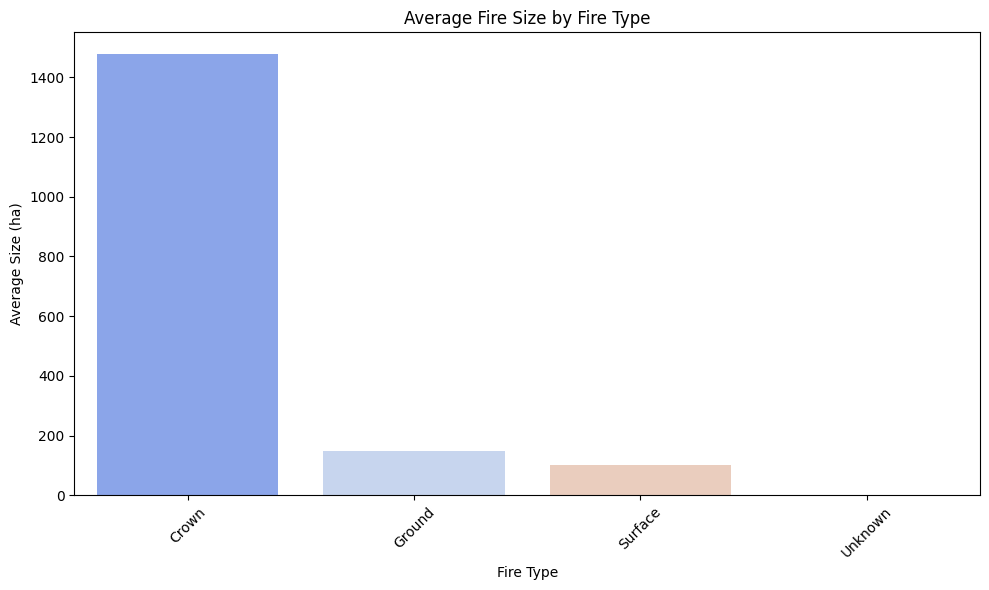

In [ ]:
average_size_by_type = wildfires_with_fsa.groupby('fire_type')['current_size'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_size_by_type, x='fire_type', y='current_size', palette='coolwarm')
plt.title('Average Fire Size by Fire Type')
plt.xlabel('Fire Type')
plt.ylabel('Average Size (ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


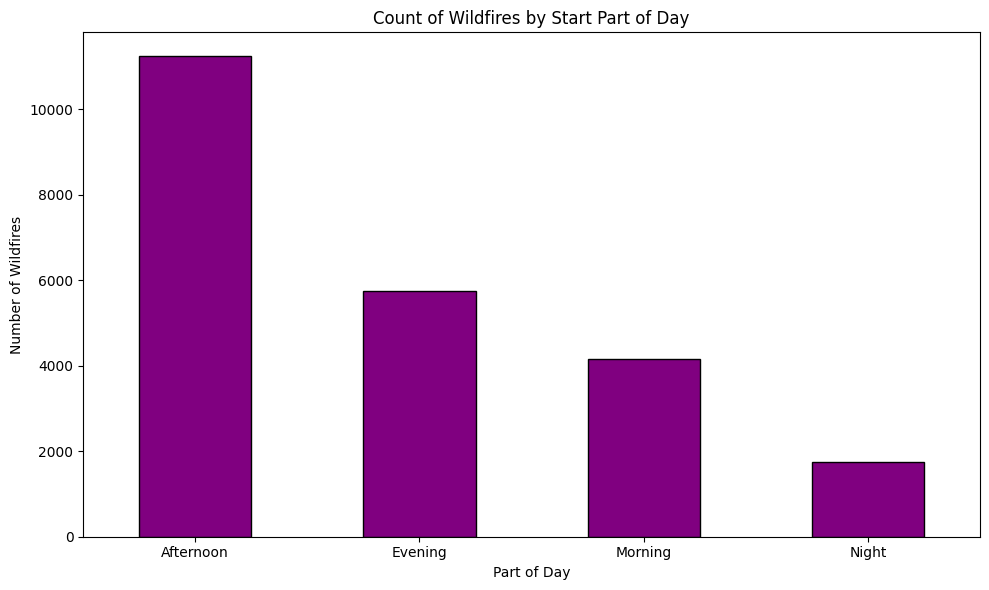

In [ ]:
fires_by_part_of_day = wildfires_with_fsa['fire_start_part_of_day'].value_counts()

plt.figure(figsize=(10, 6))
fires_by_part_of_day.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Count of Wildfires by Start Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


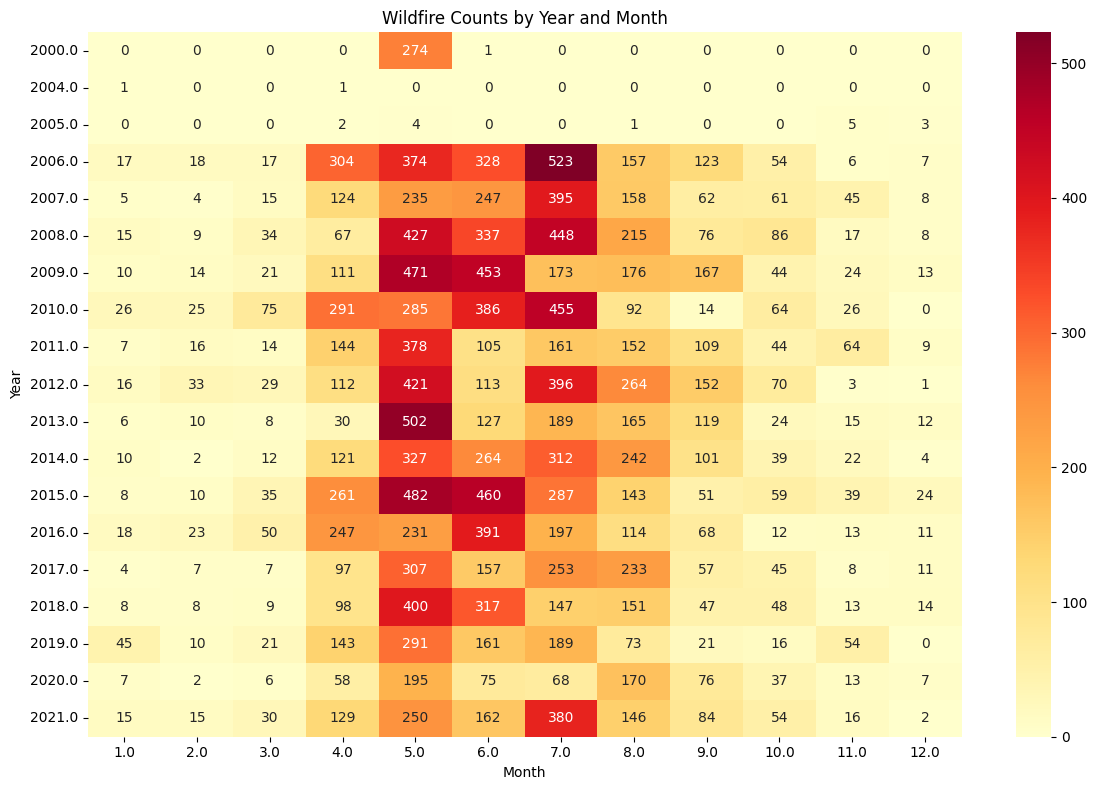

In [ ]:
heatmap_data = wildfires_with_fsa.pivot_table(index='fire_year', columns='fire_start_month', values='fire_name', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt="d")
plt.title('Wildfire Counts by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


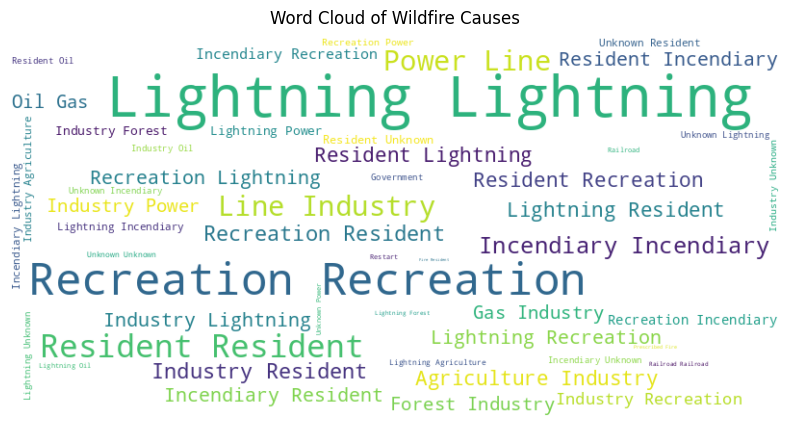

In [ ]:
from wordcloud import WordCloud

# Join all cause descriptions into a single string
text = ' '.join(description for description in wildfires_with_fsa['general_cause_desc'])

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Word Cloud of Wildfire Causes')
plt.show()


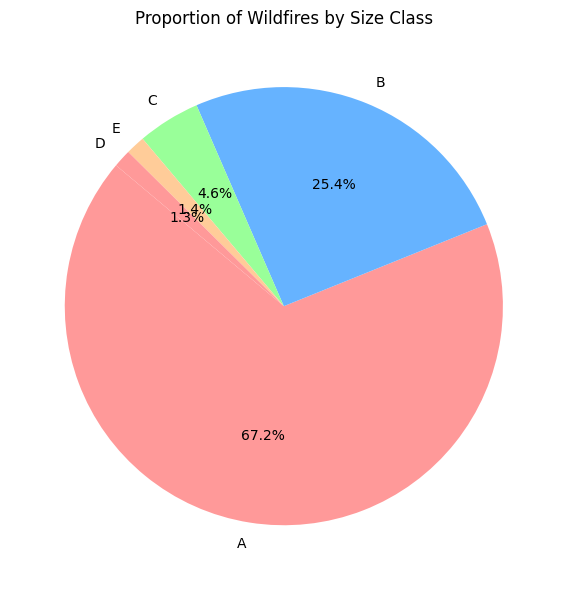

In [ ]:
size_class_counts = wildfires_with_fsa['size_class'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
size_class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Proportion of Wildfires by Size Class')
plt.ylabel('')  # Hide the y-label as it's unnecessary for a pie chart
plt.tight_layout()
plt.show()


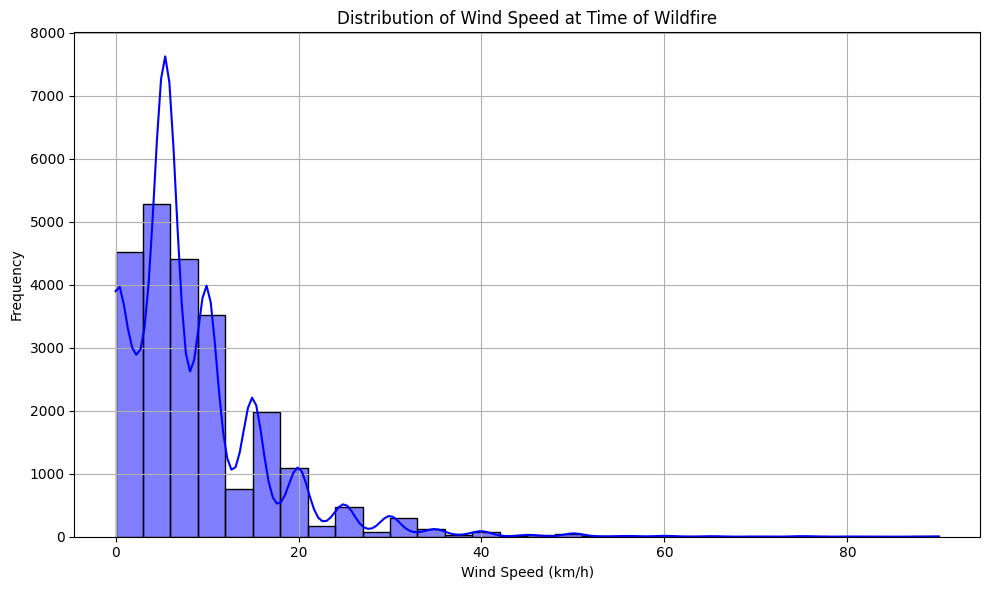

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(wildfires_with_fsa['wind_speed'], bins=30, kde=True, color='blue')
plt.title('Distribution of Wind Speed at Time of Wildfire')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


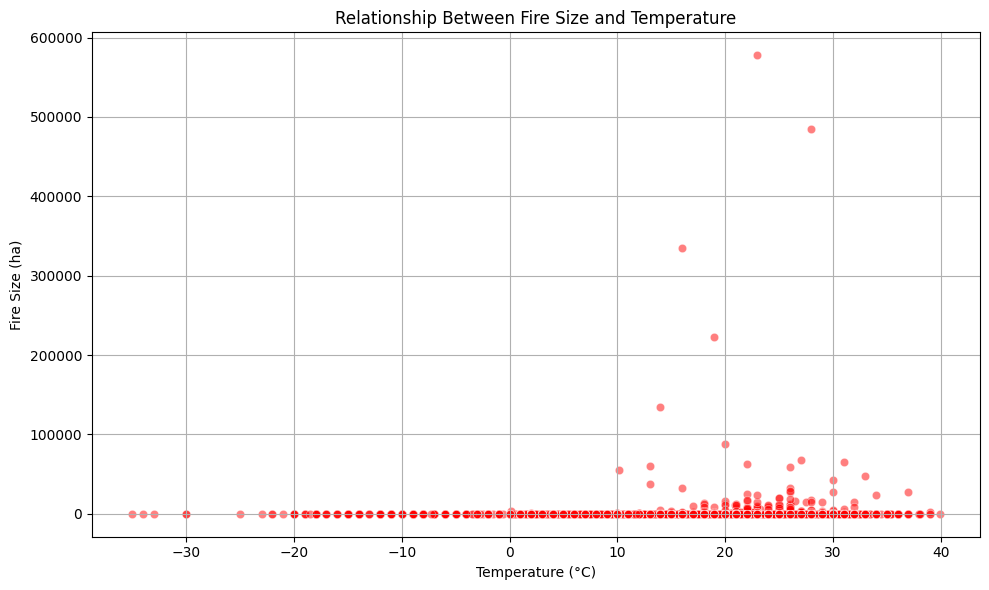

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='current_size', data=wildfires_with_fsa, color='red', alpha=0.5)
plt.title('Relationship Between Fire Size and Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fire Size (ha)')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-47-7e75870453f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='relative_humidity', y='CFSAUID', data=avg_humidity_by_fsa.sort_values(by='relative_humidity', ascending=False), palette='cool')


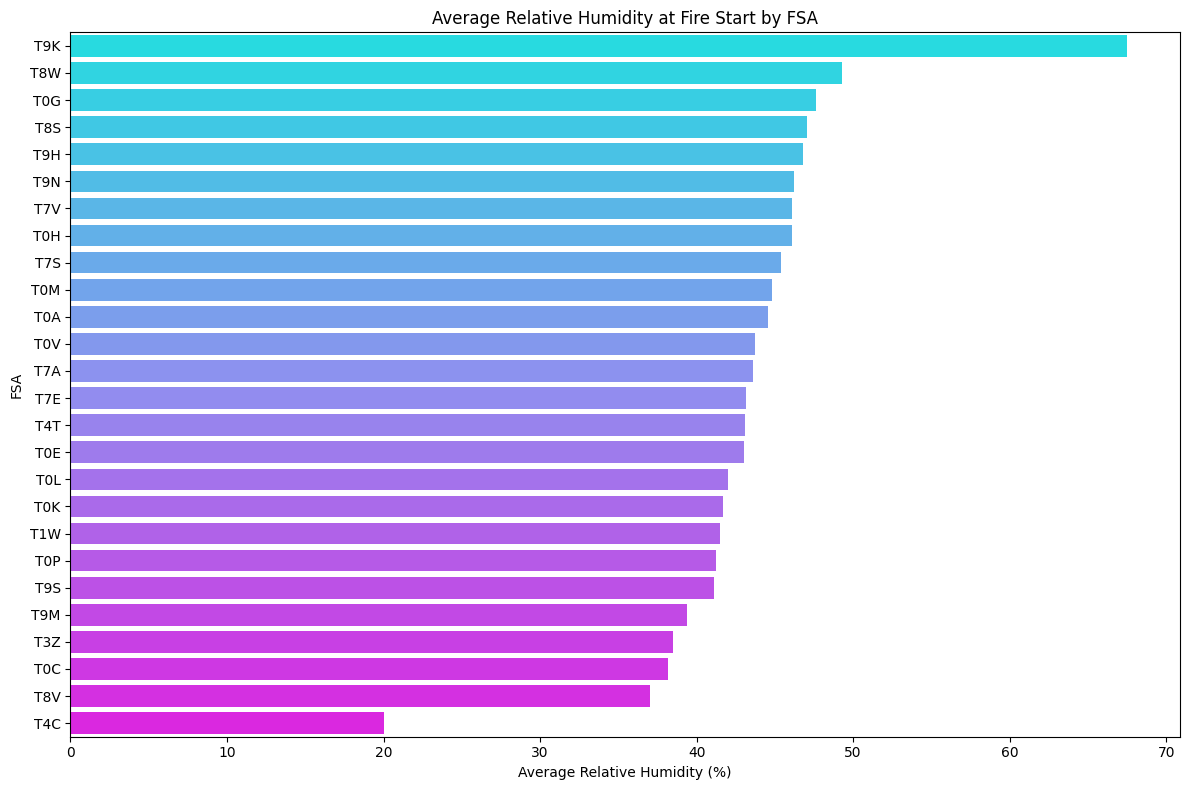

In [ ]:
# Calculate the average relative humidity for each FSA
avg_humidity_by_fsa = wildfires_with_fsa.groupby('CFSAUID')['relative_humidity'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='relative_humidity', y='CFSAUID', data=avg_humidity_by_fsa.sort_values(by='relative_humidity', ascending=False), palette='cool')
plt.title('Average Relative Humidity at Fire Start by FSA')
plt.xlabel('Average Relative Humidity (%)')
plt.ylabel('FSA')
plt.tight_layout()
plt.show()


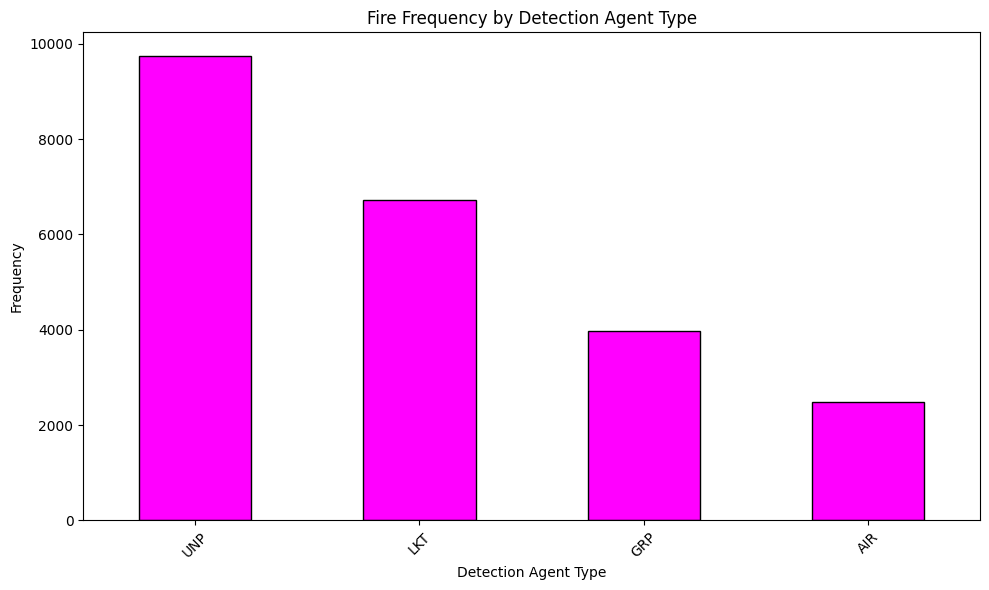

In [ ]:
detection_freq = wildfires_with_fsa['det_agent_type'].value_counts()

plt.figure(figsize=(10, 6))
detection_freq.plot(kind='bar', color='magenta', edgecolor='black')
plt.title('Fire Frequency by Detection Agent Type')
plt.xlabel('Detection Agent Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


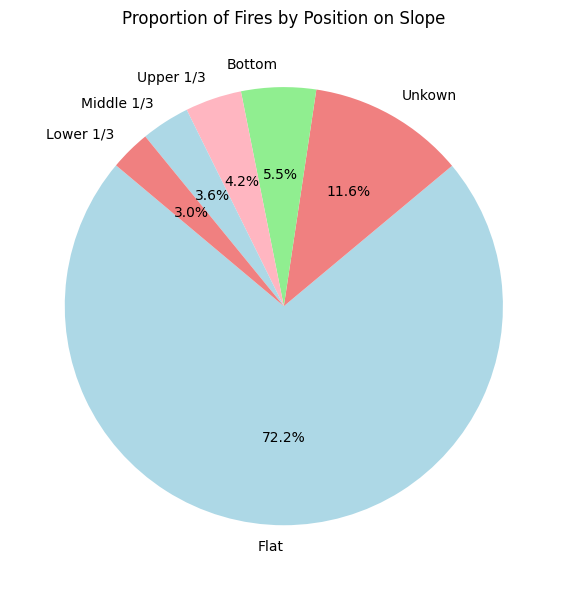

In [ ]:
slope_position_counts = wildfires_with_fsa['fire_position_on_slope'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
slope_position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#add8e6','#f08080','#90ee90','#ffb6c1'])
plt.title('Proportion of Fires by Position on Slope')
plt.ylabel('')  # Hide the y-label as it's unnecessary for a pie chart
plt.tight_layout()
plt.show()


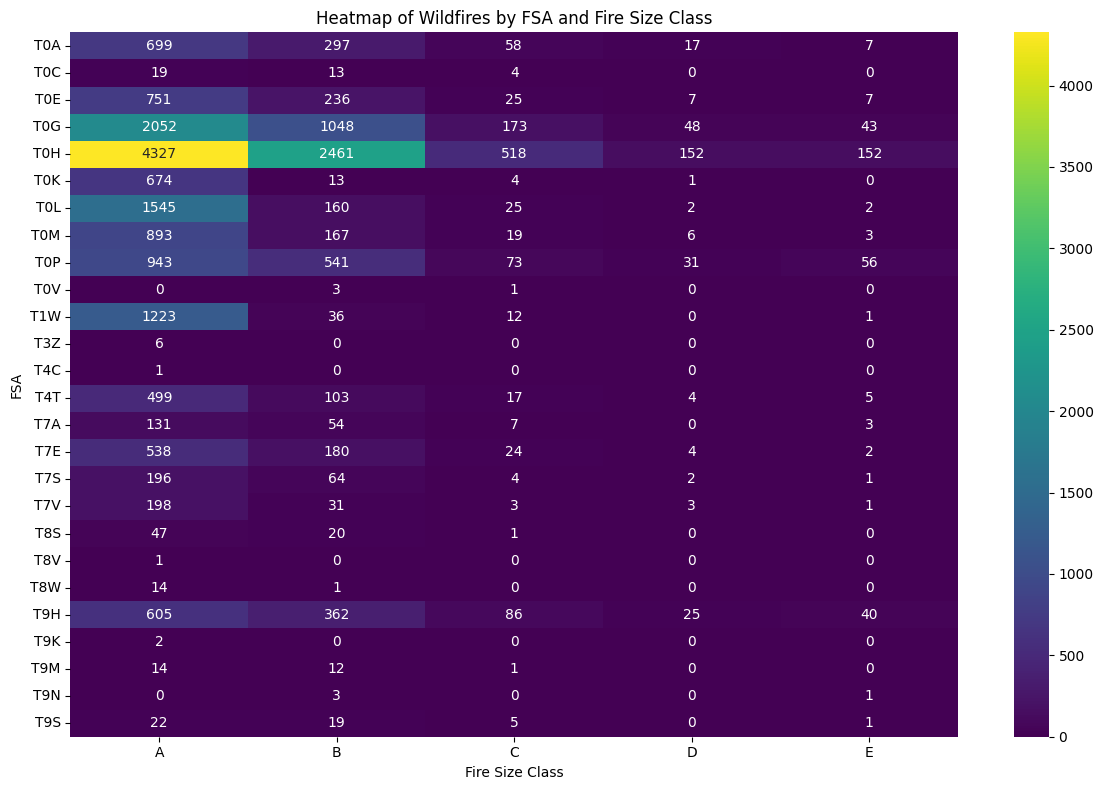

In [ ]:
# Pivot table for heatmap
pivot_table_size_fsa = wildfires_with_fsa.pivot_table(index='CFSAUID', columns='size_class', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_size_fsa, annot=True, fmt="d", cmap='viridis')
plt.title('Heatmap of Wildfires by FSA and Fire Size Class')
plt.xlabel('Fire Size Class')
plt.ylabel('FSA')
plt.tight_layout()
plt.show()


<ipython-input-51-ce65a8eb1d2e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='size_class', y='total_time_to_extinguish', data=wildfires_with_fsa, palette='Set3')


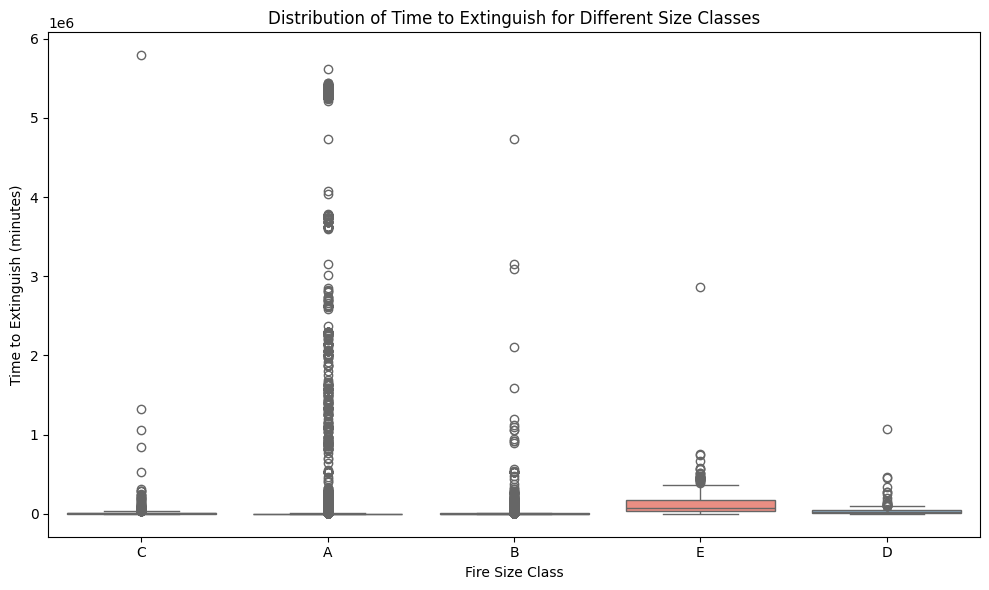

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_class', y='total_time_to_extinguish', data=wildfires_with_fsa, palette='Set3')
plt.title('Distribution of Time to Extinguish for Different Size Classes')
plt.xlabel('Fire Size Class')
plt.ylabel('Time to Extinguish (minutes)')
plt.tight_layout()
plt.show()


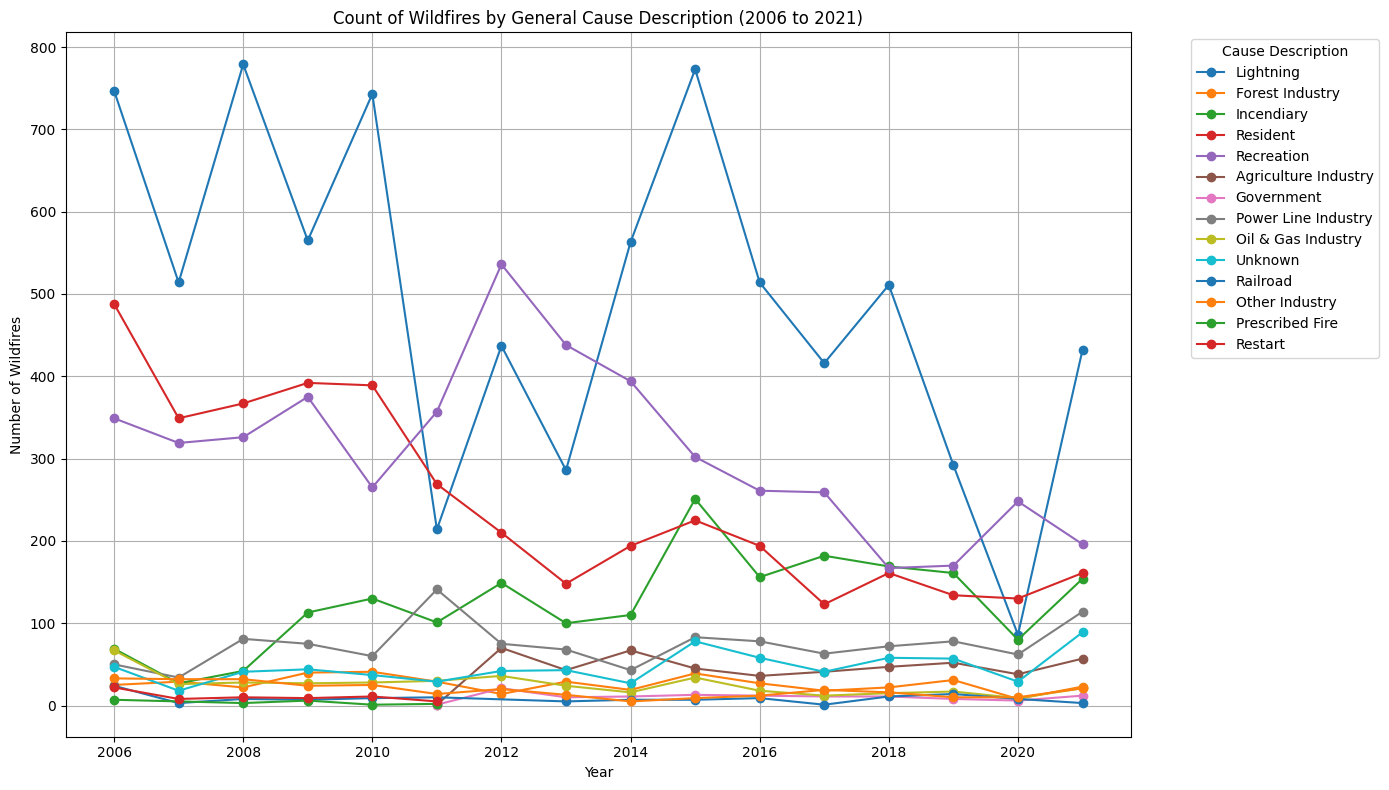

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'fire_year' is in the correct format if it's not already
wildfires_with_fsa['fire_year'] = pd.to_datetime(wildfires_with_fsa['fire_year'], format='%Y').dt.year

# Filter the DataFrame for years 2006 to 2021
filtered_wildfires = wildfires_with_fsa[(wildfires_with_fsa['fire_year'] >= 2006) & (wildfires_with_fsa['fire_year'] <= 2021)]

plt.figure(figsize=(14, 8))
for cause in filtered_wildfires['general_cause_desc'].unique():
    yearly_data = filtered_wildfires[filtered_wildfires['general_cause_desc'] == cause].groupby('fire_year').size()
    yearly_data.plot(kind='line', label=cause, marker='o')

plt.title('Count of Wildfires by General Cause Description (2006 to 2021)')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')
plt.legend(title='Cause Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-53-987114b3f501>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='size_class', y='fire_spread_rate', data=average_spread_by_size, palette='viridis')


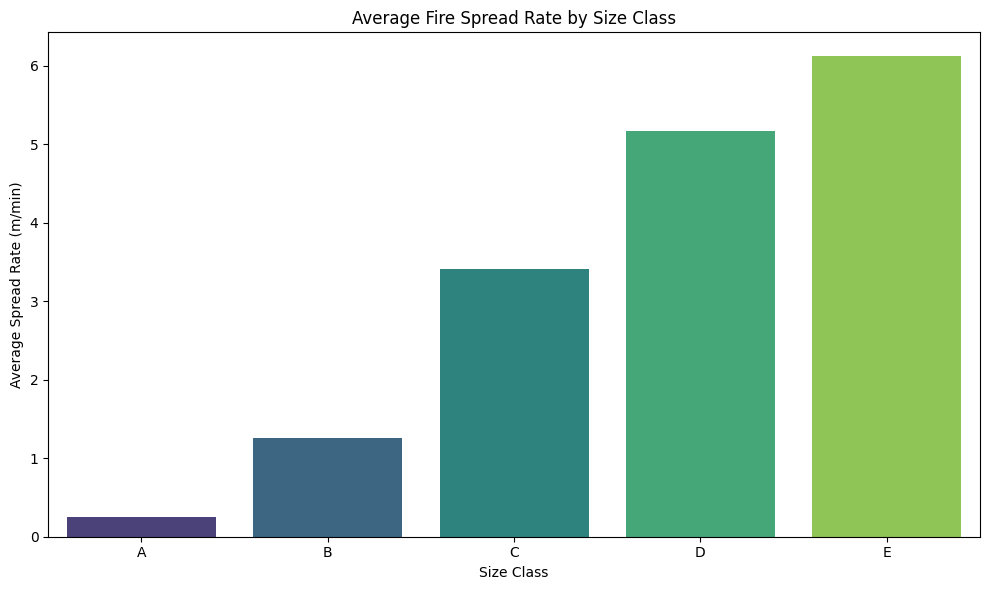

In [ ]:
average_spread_by_size = wildfires_with_fsa.groupby('size_class')['fire_spread_rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='size_class', y='fire_spread_rate', data=average_spread_by_size, palette='viridis')
plt.title('Average Fire Spread Rate by Size Class')
plt.xlabel('Size Class')
plt.ylabel('Average Spread Rate (m/min)')
plt.tight_layout()
plt.show()


<ipython-input-54-a2a0a128a4ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CFSAUID', y='current_size', data=top_fsas_by_size, palette='autumn')


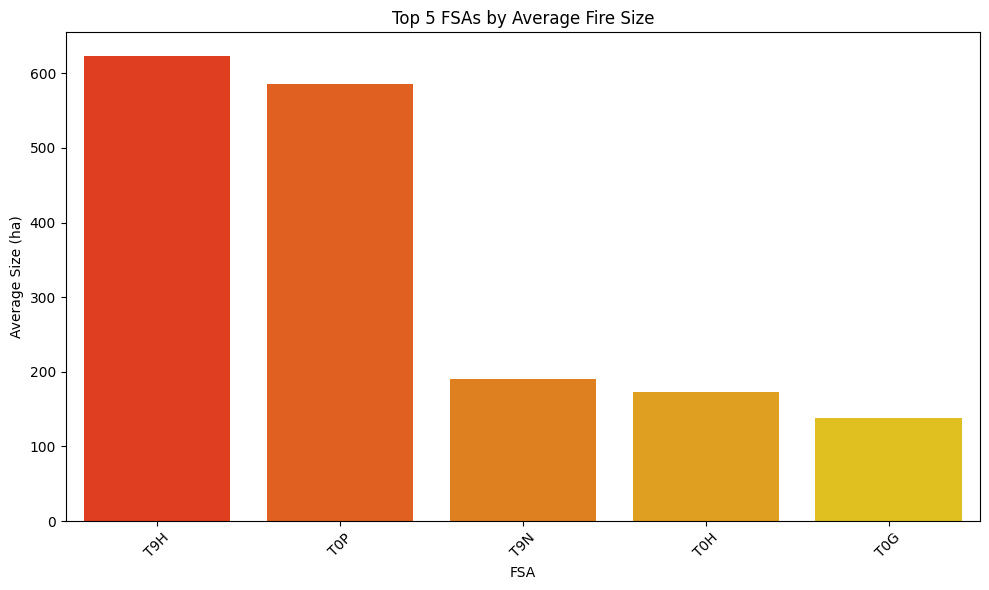

In [ ]:
top_fsas_by_size = wildfires_with_fsa.groupby('CFSAUID')['current_size'].mean().nlargest(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CFSAUID', y='current_size', data=top_fsas_by_size, palette='autumn')
plt.title('Top 5 FSAs by Average Fire Size')
plt.xlabel('FSA')
plt.ylabel('Average Size (ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-55-89d84f60bb45>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


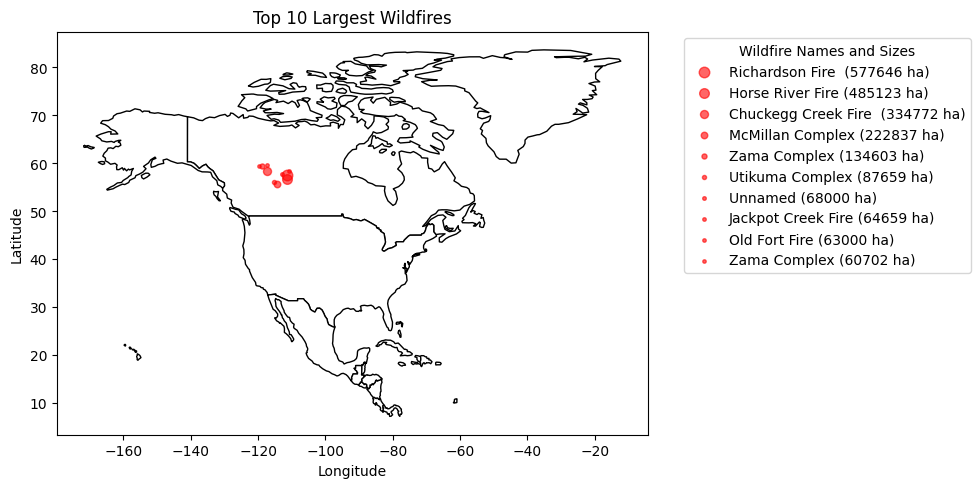

In [ ]:
top_10_fires = wildfires_with_fsa.nlargest(10, 'current_size')
fig, ax = plt.subplots(figsize=(10, 10))

# Base map (you can adjust the extent to your specific area of interest)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world[world['continent'] == 'North America'].plot(ax=ax, color='white', edgecolor='black')

# Plotting each of the top 10 fires
for idx, row in top_10_fires.iterrows():
    ax.scatter(row['geometry'].x, row['geometry'].y, s=row['current_size']/10000,  # Adjust size divisor as needed
               label=f"{row['fire_name']} ({int(row['current_size'])} ha)", color='red', alpha=0.6)

# Customizing the plot
ax.set_title('Top 10 Largest Wildfires')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(title="Wildfire Names and Sizes", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


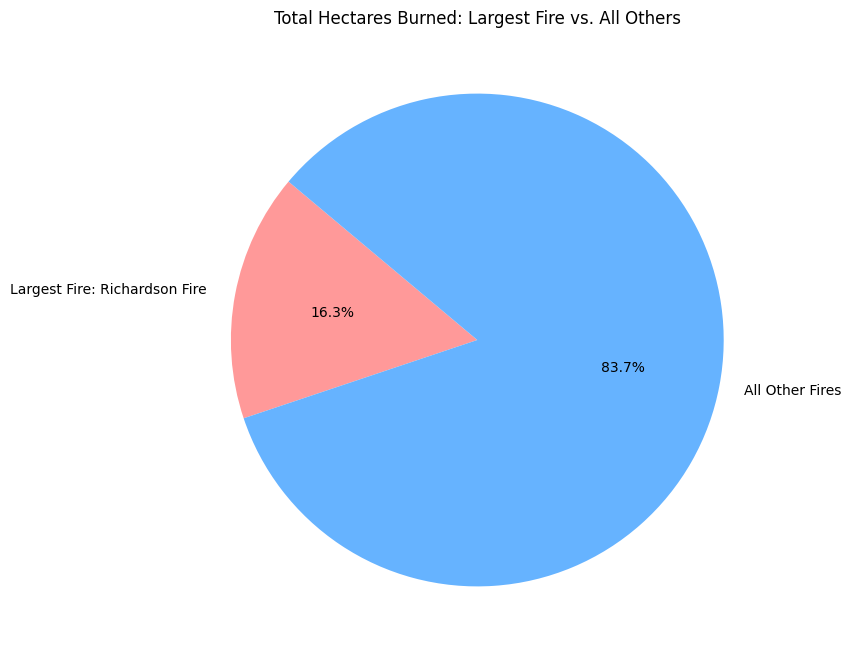

In [ ]:
# Identifying the largest fire
largest_fire = wildfires_with_fsa.loc[wildfires_with_fsa['current_size'].idxmax()]

# Data preparation
largest_fire_area = largest_fire['current_size']
other_fires_area = wildfires_with_fsa['current_size'].sum() - largest_fire_area

# Data for plotting
sizes = [largest_fire_area, other_fires_area]
labels = [f"Largest Fire: {largest_fire['fire_name']}", 'All Other Fires']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Total Hectares Burned: Largest Fire vs. All Others')
plt.show()


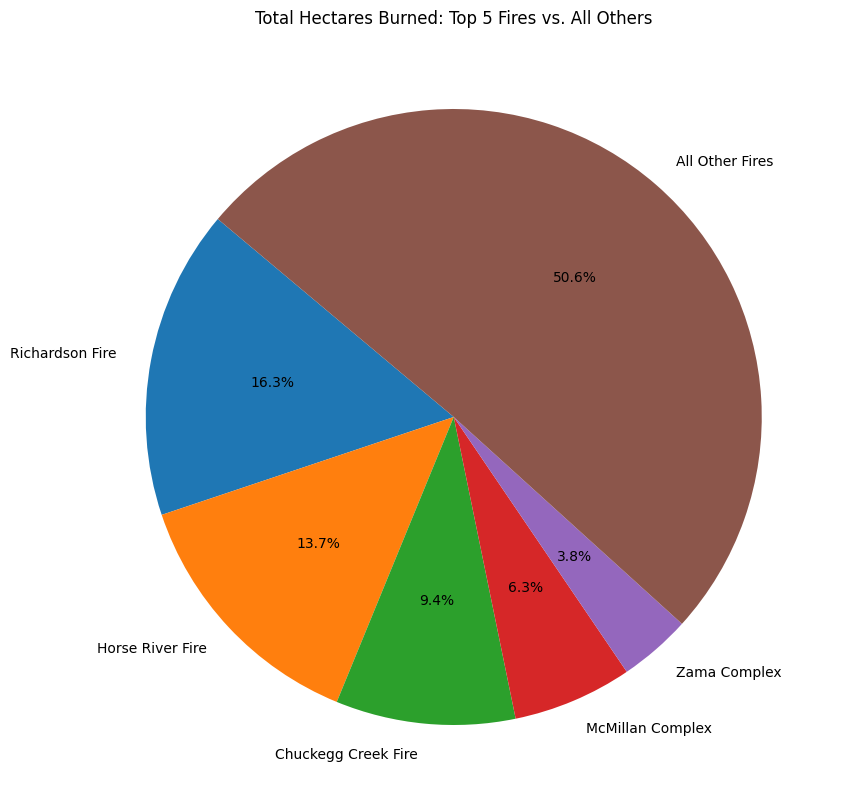

In [ ]:
# Identifying the top 5 largest fires
top_5_fires = wildfires_with_fsa.nlargest(5, 'current_size')

# Data preparation
top_5_fires_area = top_5_fires['current_size'].sum()
other_fires_area = wildfires_with_fsa['current_size'].sum() - top_5_fires_area

# Labels with fire names
top_5_labels = top_5_fires['fire_name'].tolist() + ['All Other Fires']

# Data for plotting
sizes = top_5_fires['current_size'].tolist() + [other_fires_area]

# Plot
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=top_5_labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Hectares Burned: Top 5 Fires vs. All Others')
plt.show()


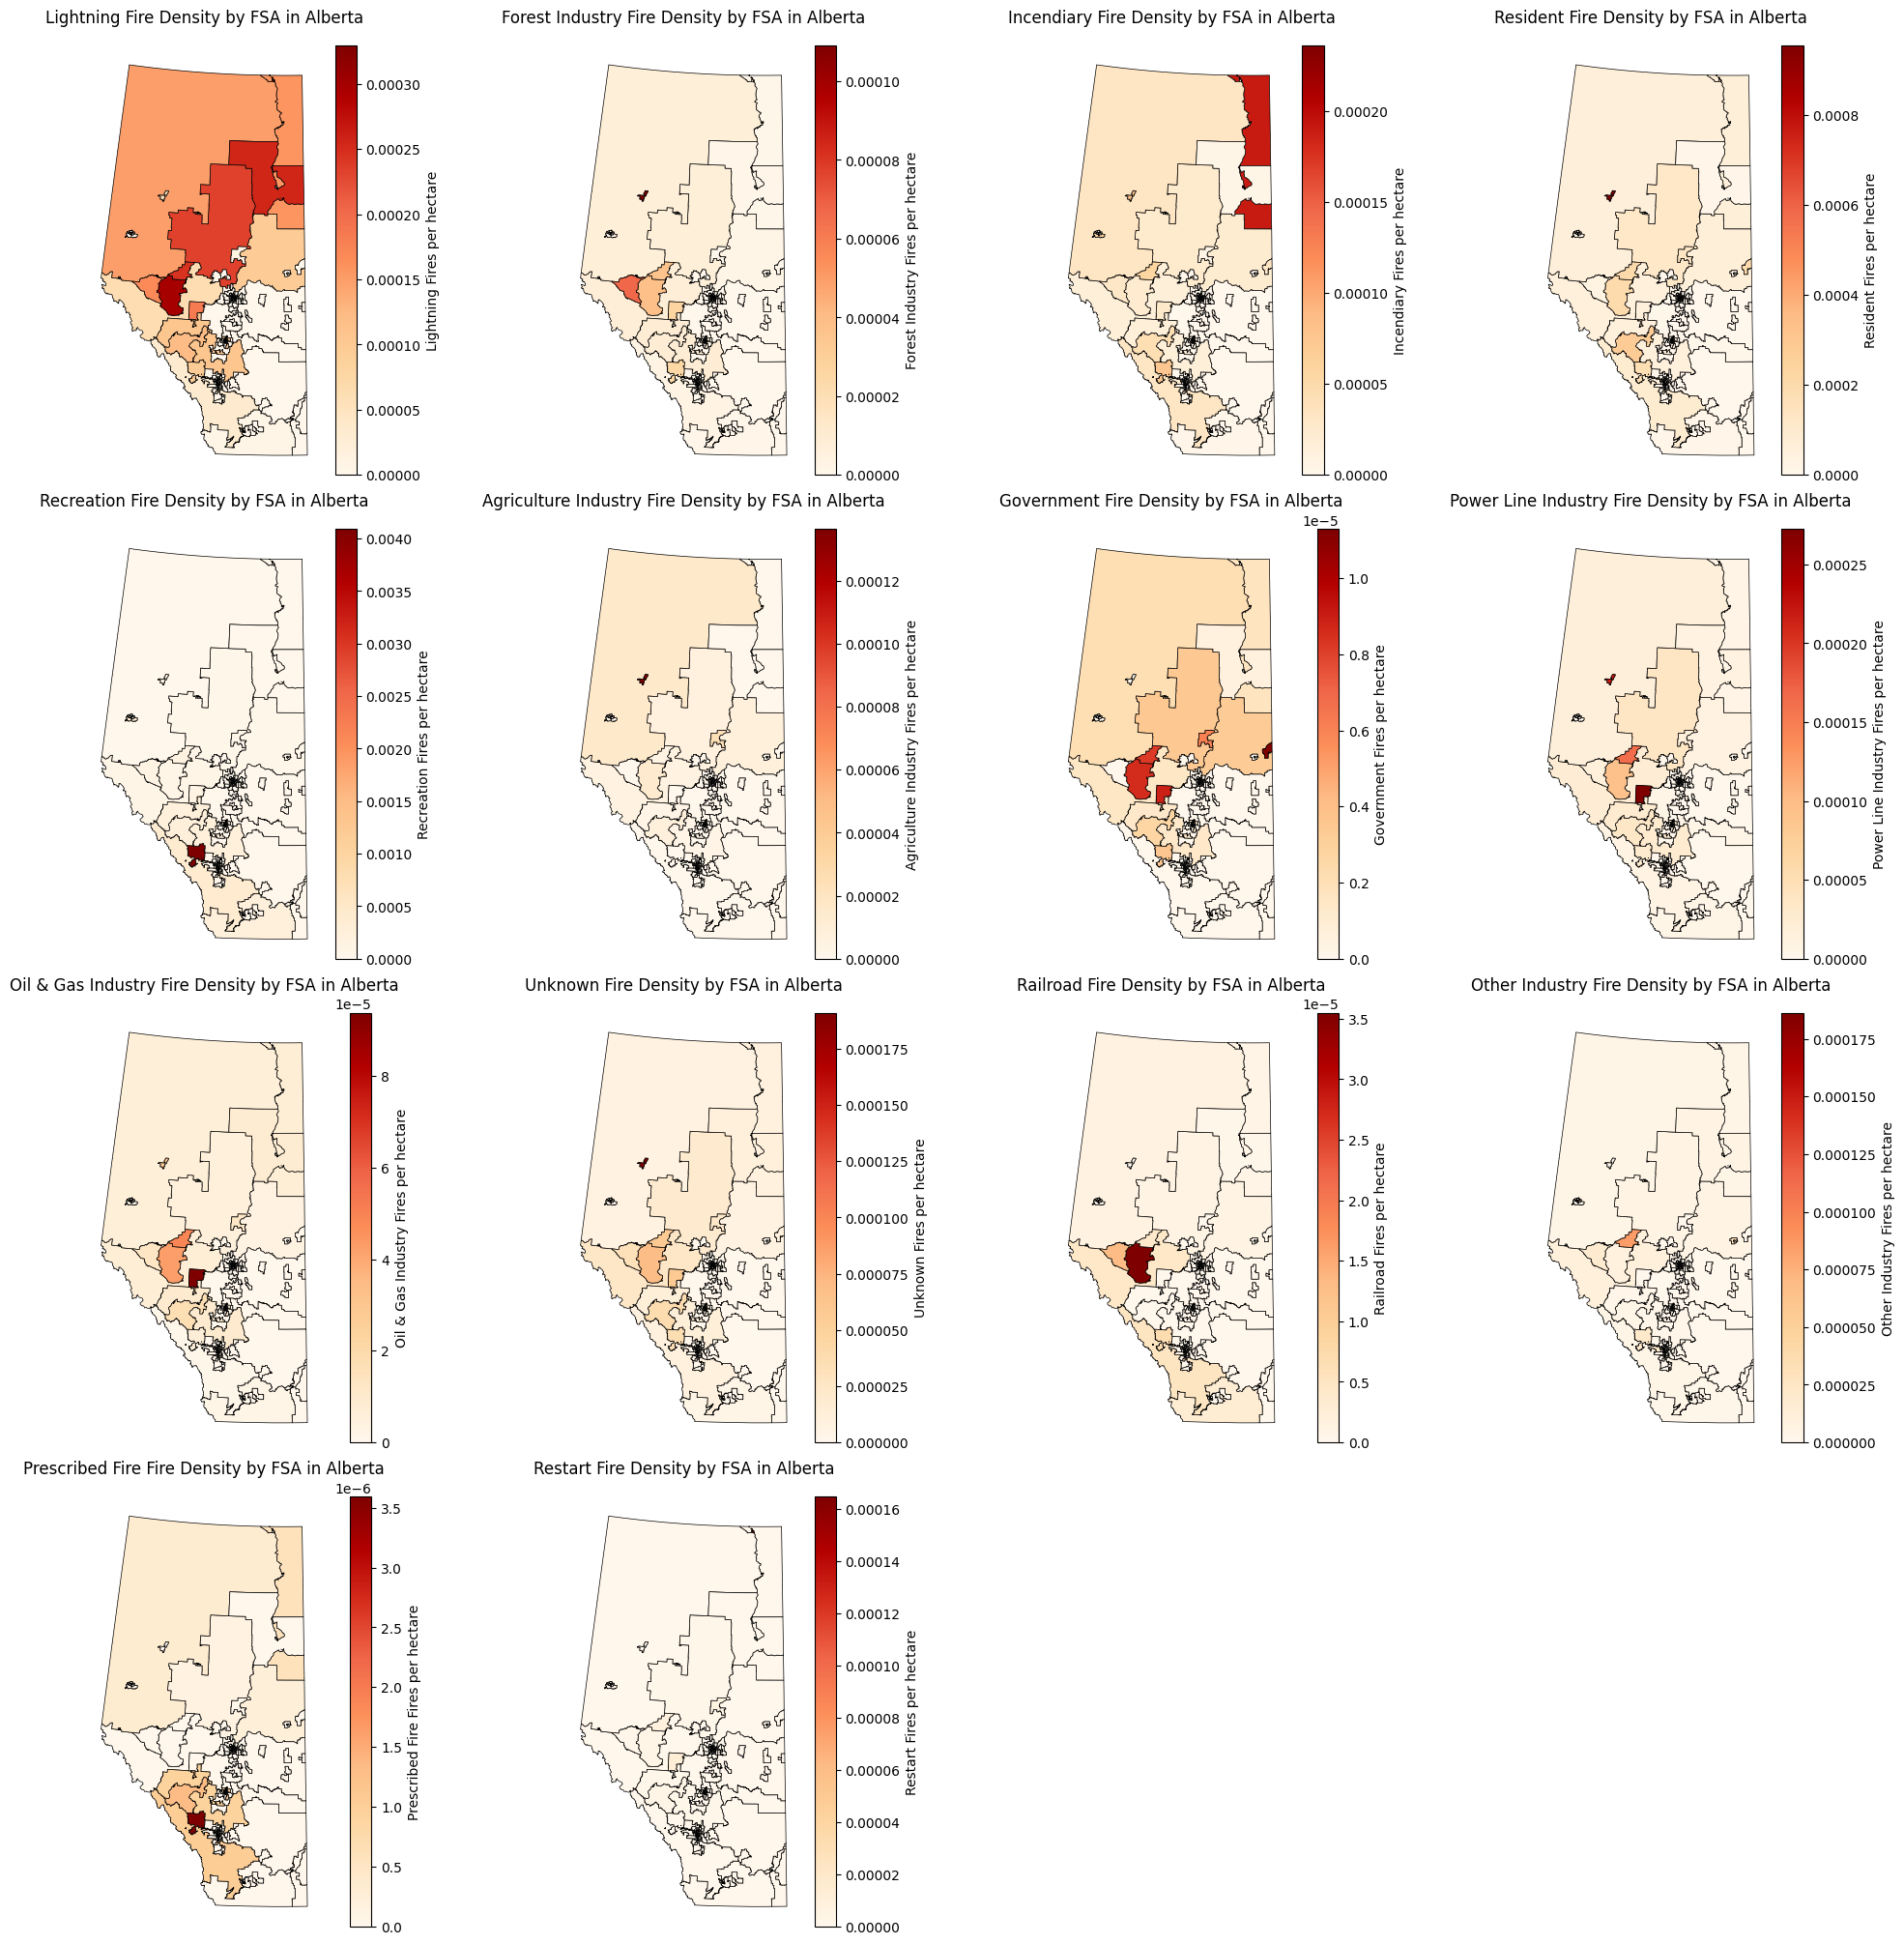

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import math

# Assuming fsa_boundaries and wildfires_with_fsa are already defined GeoDataFrames

# Ensure your fsa_boundaries is in the right CRS for area calculations if not already done.
fsa_boundaries = fsa_boundaries.to_crs(epsg=32612)

# Then calculate the area of each FSA in hectares (1 sq km = 100 hectares).
fsa_boundaries['area_hectares'] = fsa_boundaries.geometry.area / 10**4

# Get a list of unique fire types.
fire_types = wildfires_with_fsa['general_cause_desc'].dropna().unique()

# Determine the number of rows and columns for the subplots based on the number of fire types.
num_fire_types = len(fire_types)
num_cols = math.ceil(math.sqrt(num_fire_types))
num_rows = math.ceil(num_fire_types / num_cols)

# Set up the matplotlib figure with subplots.
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20), constrained_layout=True)

# Flatten the array of axes if necessary.
axs = np.array(axs).reshape(-1)

# Loop through each fire type and create a plot.
for ax, fire_type in zip(axs, fire_types):
    # Filter wildfires_with_fsa for the current fire type.
    df_fire_type = wildfires_with_fsa[wildfires_with_fsa['general_cause_desc'] == fire_type]

    # Aggregate the total number of wildfires per FSA for the current fire type.
    fire_type_counts = df_fire_type.groupby('CFSAUID').size().reset_index(name='fire_type_count')

    # Merge with the fsa_boundaries GeoDataFrame.
    fsa_with_fire_type_counts = fsa_boundaries.merge(fire_type_counts, on='CFSAUID', how='left')
    fsa_with_fire_type_counts['fire_type_count'] = fsa_with_fire_type_counts['fire_type_count'].fillna(0)

    # Normalize the counts by area in hectares.
    fsa_with_fire_type_counts['fire_type_density'] = fsa_with_fire_type_counts['fire_type_count'] / fsa_with_fire_type_counts['area_hectares']

    # Plot the FSA boundaries colored by the density of the current fire type.
    fsa_with_fire_type_counts.plot(column='fire_type_density', ax=ax, legend=True,
                                   legend_kwds={'label': f"{fire_type} Fires per hectare"},
                                   cmap='OrRd', edgecolor='black', linewidth=0.5)

    # Customize each subplot.
    ax.set_title(f"{fire_type} Fire Density by FSA in Alberta", fontsize=12)
    ax.set_axis_off()

# Hide any unused axes if the number of subplots isn't perfect square
for ax in axs[num_fire_types:]:
    ax.set_visible(False)

# Adjust layout to prevent overlapping subplots and display the figure.
plt.show()


<ipython-input-59-3c662a701f68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_burned_per_year, x='fire_year', y='current_size', palette='coolwarm')


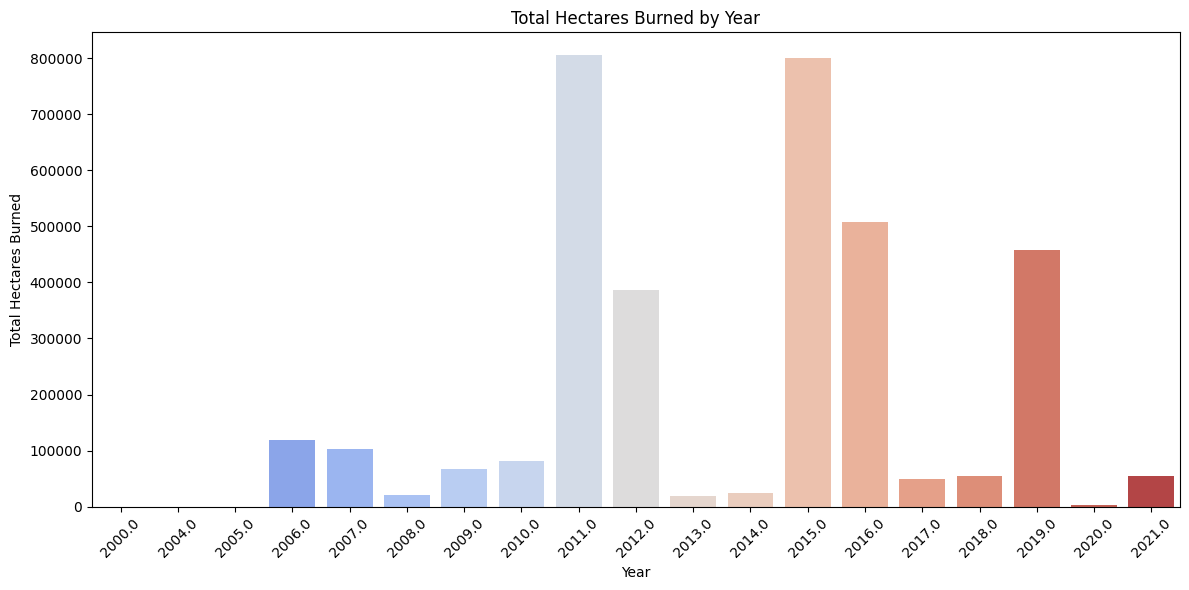

In [ ]:
total_burned_per_year = wildfires_with_fsa.groupby("fire_year")['current_size'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=total_burned_per_year, x='fire_year', y='current_size', palette='coolwarm')
plt.title('Total Hectares Burned by Year')
plt.xlabel('Year')
plt.ylabel('Total Hectares Burned')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()

plt.show()

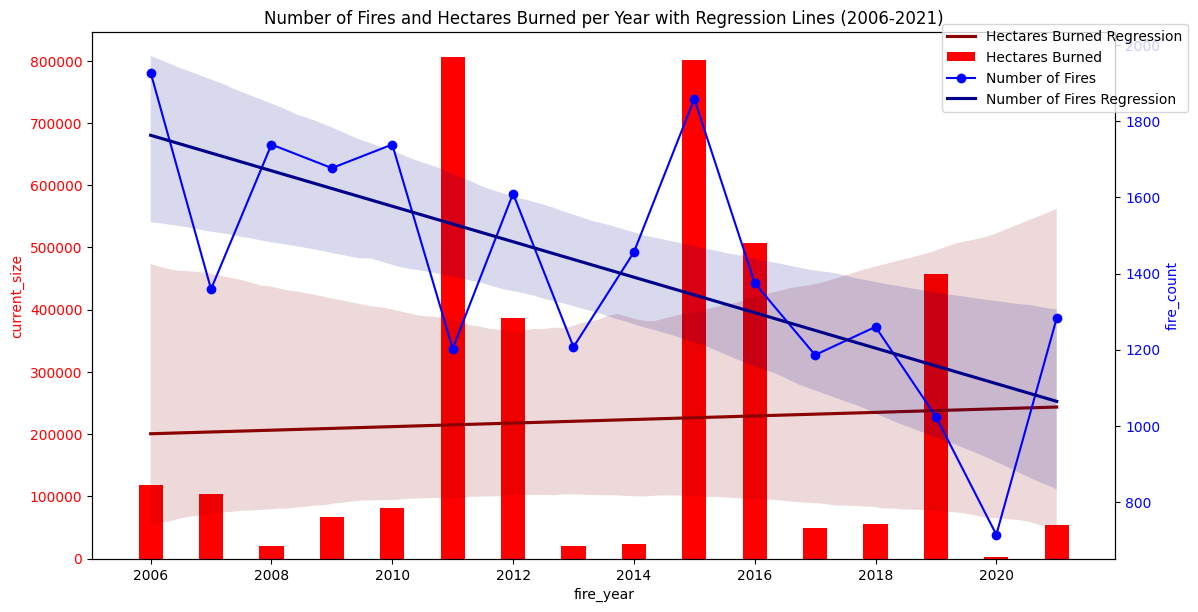

In [ ]:
# Filtering the DataFrame for years 2006 to 2021
filtered_df = df[(df['fire_year'] >= 2006) & (df['fire_year'] <= 2021)]

# Calculating the total number of hectares burned per year within the filtered range
hectares_burned_per_year = filtered_df.groupby('fire_year')['current_size'].sum().reset_index()

# Calculating the total number of fires per year within the filtered range
fires_per_year = filtered_df.groupby('fire_year').size().reset_index(name='fire_count')

# Merging the two datasets on 'fire_year'
combined_data = pd.merge(hectares_burned_per_year, fires_per_year, on='fire_year')

# Creating the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for hectares burned
ax1.bar(combined_data['fire_year'], combined_data['current_size'], color='red', label='Hectares Burned', width=0.4)
ax1.set_xlabel('Year')
ax1.set_ylabel('Hectares Burned', color='red')
ax1.tick_params(axis='y', labelcolor='red')


# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()
ax2.plot(combined_data['fire_year'], combined_data['fire_count'], 'o-', color='blue', label='Number of Fires')
ax2.set_ylabel('Number of Fires', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Adding regression lines
sns.regplot(x='fire_year', y='current_size', data=combined_data, scatter=False, ax=ax1, color='darkred', label='Hectares Burned Regression')
sns.regplot(x='fire_year', y='fire_count', data=combined_data, scatter=False, ax=ax2, color='darkblue', label='Number of Fires Regression')

# Final touches with adjusted legend position
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1, 1))  # Move legend to top right
plt.title('Number of Fires and Hectares Burned per Year with Regression Lines (2006-2021)')
plt.show()


In [ ]:
wildfires_with_fsa.columns

Index(['fire_year', 'fire_name', 'fire_start_date', 'discovered_date',
       'reported_date', 'dispatch_date', 'start_for_fire_date',
       'assessment_datetime', 'first_bucket_drop_date',
       'ia_arrival_at_fire_date', 'fire_fighting_start_date', 'bh_fs_date',
       'uc_fs_date', 'ex_fs_date', 'fire_start_month', 'fire_start_weekday',
       'fire_start_part_of_day', 'fire_location_latitude',
       'fire_location_longitude', 'fire_region', 'current_size', 'size_class',
       'fire_type', 'fire_position_on_slope', 'fuel_type',
       'general_cause_desc', 'true_cause', 'det_agent', 'det_agent_type',
       'industry_identifier_desc', 'responsible_group_desc', 'activity_class',
       'weather_conditions_over_fire', 'temperature', 'relative_humidity',
       'wind_speed', 'fire_spread_rate', 'initial_action_by',
       'dispatched_resource', 'assessment_resource', 'ia_access',
       'bucketing_on_fire', 'distance_from_water_source',
       'assessment_hectares', 'bh_hectares', 

In [ ]:
# Assuming wildfires_with_fsa is your DataFrame and it contains 'current_size' and 'fire_year' columns

# Total hectares burned
total_hectares_burned = wildfires_with_fsa['current_size'].sum()
print(f"Total hectares burned: {total_hectares_burned}")

# Median hectares burned yearly
median_land_burned_yearly = wildfires_with_fsa.groupby('fire_year')['current_size'].median()
print("Median hectares burned yearly:\n", median_land_burned_yearly)

# Mean hectares burned yearly
mean_land_burned_yearly = wildfires_with_fsa.groupby('fire_year')['current_size'].mean()
print("Mean hectares burned yearly:\n", mean_land_burned_yearly)

# Average number of fires yearly
# First, calculate the count of fires per year, then take the mean of these counts for the average
fires_count_yearly = wildfires_with_fsa.groupby('fire_year').size()
mean_fires_yearly = fires_count_yearly.mean()
print(f"Average number of fires yearly: {mean_fires_yearly}")

# Printing total hectares burned again seems redundant unless it's meant for comparison or further calculation,
# so let's ensure the print statement clearly indicates what is being shown if needed.
print(f"Total hectares burned (repeated for clarity): {total_hectares_burned}")


Total hectares burned: 3553060.42
Median hectares burned yearly:
 fire_year
2000.0     0.01
2004.0    18.20
2005.0     0.01
2006.0     0.01
2007.0     0.01
2008.0     0.02
2009.0     0.02
2010.0     0.10
2011.0     0.01
2012.0     0.01
2013.0     0.01
2014.0     0.01
2015.0     0.10
2016.0     0.05
2017.0     0.03
2018.0     0.10
2019.0     0.04
2020.0     0.01
2021.0     0.06
Name: current_size, dtype: float64
Mean hectares burned yearly:
 fire_year
2000.0      0.032218
2004.0     18.200000
2005.0      1.026667
2006.0     61.567137
2007.0     76.248138
2008.0     12.040224
2009.0     39.872850
2010.0     46.699316
2011.0    669.897614
2012.0    239.696391
2013.0     16.145576
2014.0     16.273201
2015.0    430.991452
2016.0    368.676095
2017.0     41.511594
2018.0     43.596571
2019.0    446.354238
2020.0      4.599006
2021.0     42.107132
Name: current_size, dtype: float64
Average number of fires yearly: 1205.842105263158
Total hectares burned (repeated for clarity): 3553060.42


In [ ]:
file_path = '/content/drive/MyDrive/cxc_data/9810001901-noSymbol.csv'
population_df = pd.read_csv(file_path, skiprows=7)

population_df.columns = ['Geographic Name', 'Population 2021', 'Total Private Dwellings 2021', 'Private Dwellings Occupied by Usual Residents 2021']
population_df = population_df[population_df['Geographic Name'].str.len() == 3]
population_df.reset_index(drop=True, inplace=True)
population_df['Population 2021'] = pd.to_numeric(population_df['Population 2021'].str.replace(',', ''))
population_df['Total Private Dwellings 2021'] = pd.to_numeric(population_df['Total Private Dwellings 2021'].str.replace(',', ''))
population_df['Private Dwellings Occupied by Usual Residents 2021'] = pd.to_numeric(population_df['Private Dwellings Occupied by Usual Residents 2021'].str.replace(',', ''))

population_df.head()

Geographic Name  Population 2021  Total Private Dwellings 2021  \
0             A0A            44930                         26102   
1             A0B            19287                         13265   
2             A0C            11972                          8069   
3             A0E            21209                         12623   
4             A0G            33316                         21177   

   Private Dwellings Occupied by Usual Residents 2021  
0                                              19752   
1                                               9100   
2                                               5610   
3                                               9741   
4                                              14992

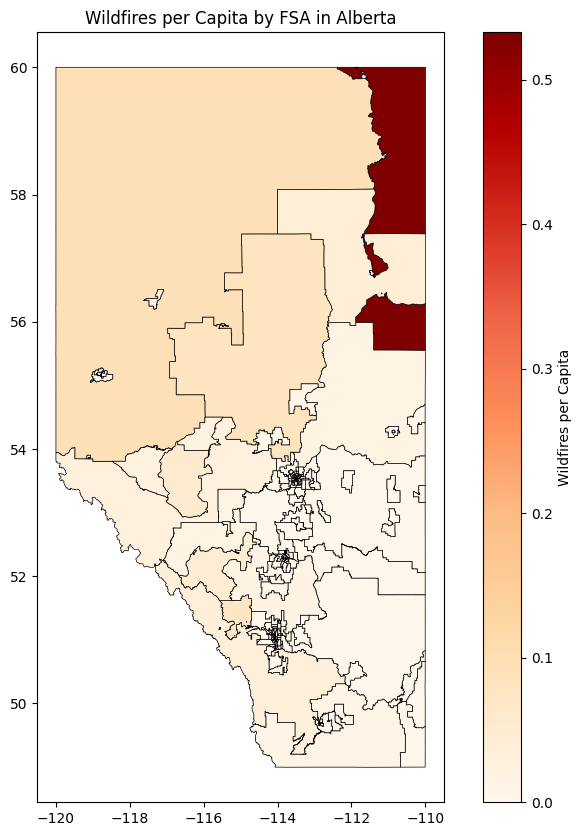

In [ ]:
fsa_data_with_population = fsa_boundaries_with_counts.merge(population_df, left_on='CFSAUID', right_on='Geographic Name', how='left')

fsa_data_with_population['wildfires_per_capita'] = fsa_data_with_population['wildfire_count'] / fsa_data_with_population['Population 2021']
fig, ax = plt.subplots(figsize=(10, 10))
fsa_data_with_population.plot(column='wildfires_per_capita', ax=ax, legend=True,
                 legend_kwds={'label': "Wildfires per Capita"},
                 cmap='OrRd', edgecolor='black', linewidth=0.5)
ax.set_title('Wildfires per Capita by FSA in Alberta')
plt.show()

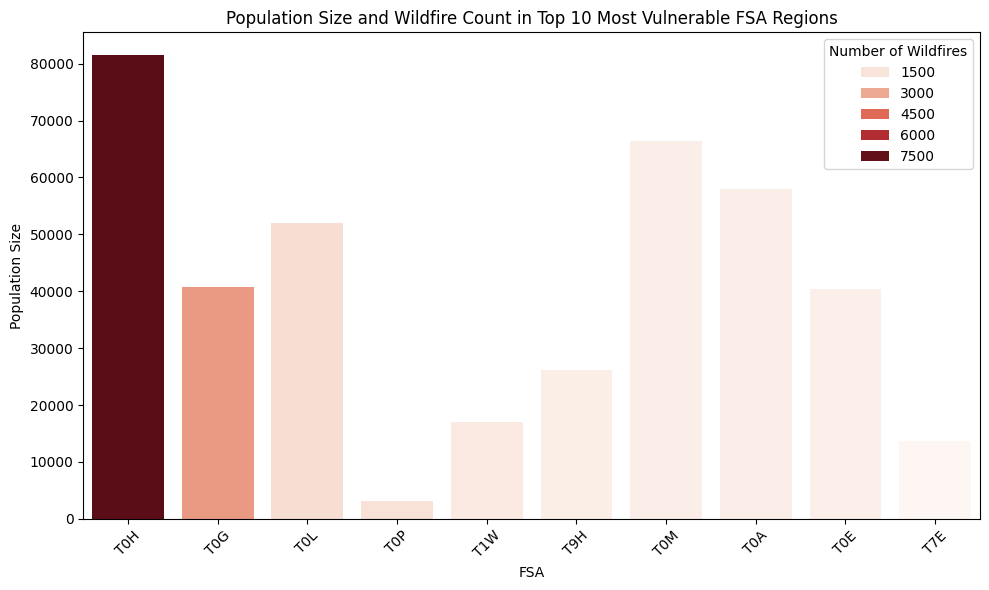

In [ ]:
top_vulnerable_fsas = fsa_data_with_population.nlargest(10, 'wildfire_count')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_vulnerable_fsas, x='CFSAUID', y='Population 2021', palette='Reds', hue='wildfire_count')
plt.title('Population Size and Wildfire Count in Top 10 Most Vulnerable FSA Regions')
plt.xlabel('FSA')
plt.ylabel('Population Size')
plt.legend(title='Number of Wildfires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

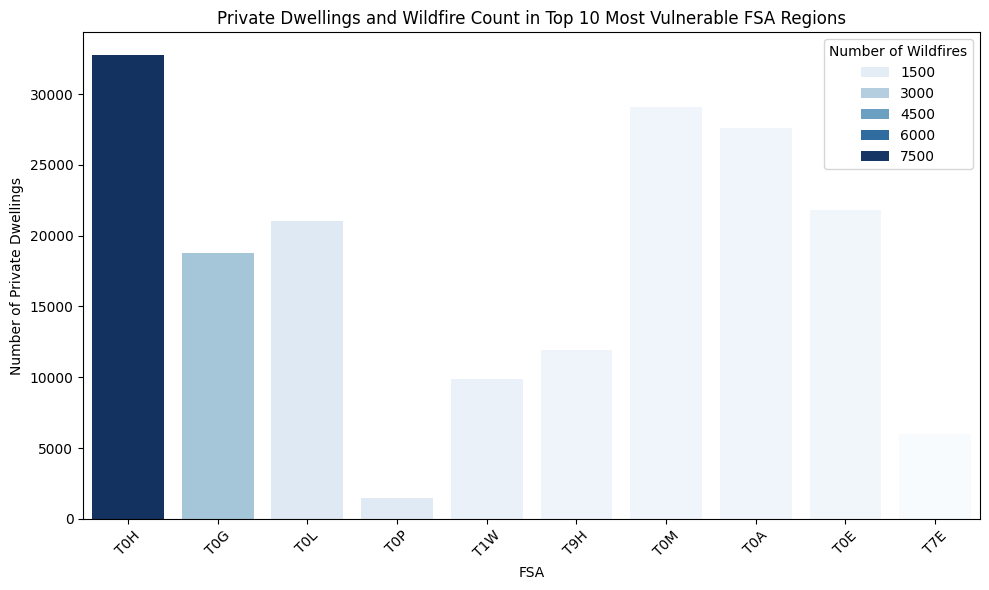

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_vulnerable_fsas, x='CFSAUID', y='Total Private Dwellings 2021', palette='Blues', hue='wildfire_count')
plt.title('Private Dwellings and Wildfire Count in Top 10 Most Vulnerable FSA Regions')
plt.xlabel('FSA')
plt.ylabel('Number of Private Dwellings')
plt.legend(title='Number of Wildfires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

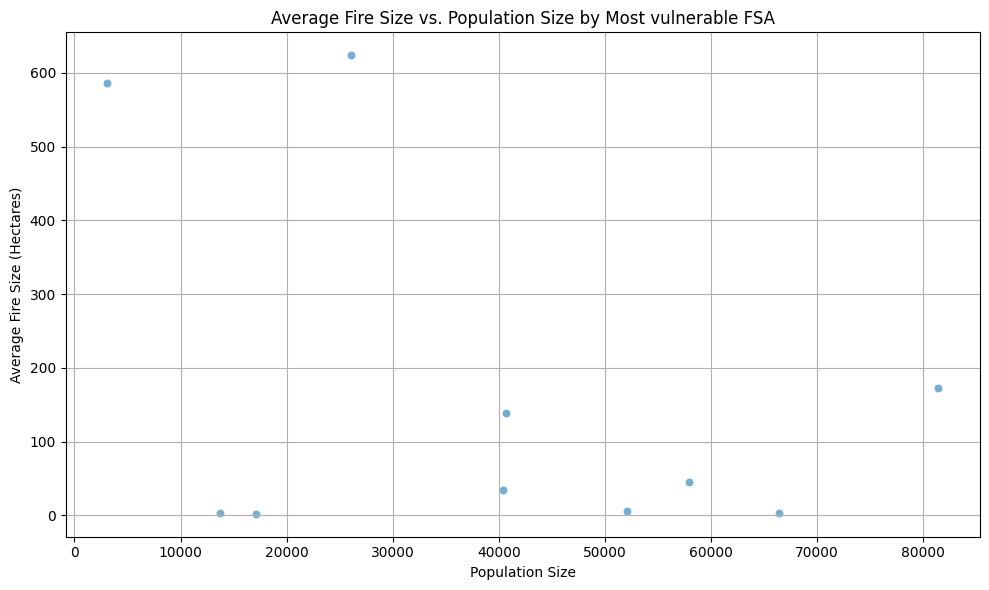

In [ ]:
fsa_data_with_population_and_size = top_vulnerable_fsas.merge(average_fire_size_by_fsa, on='CFSAUID', how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=fsa_data_with_population_and_size, x='Population 2021', y='average_fire_size', alpha=0.6)
plt.title('Average Fire Size vs. Population Size by Most vulnerable FSA')
plt.xlabel('Population Size')
plt.ylabel('Average Fire Size (Hectares)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-69-cd1270fed229>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top_vulnerable_fsas['area_sq_km'] = top_vulnerable_fsas['geometry'].area / 10**6


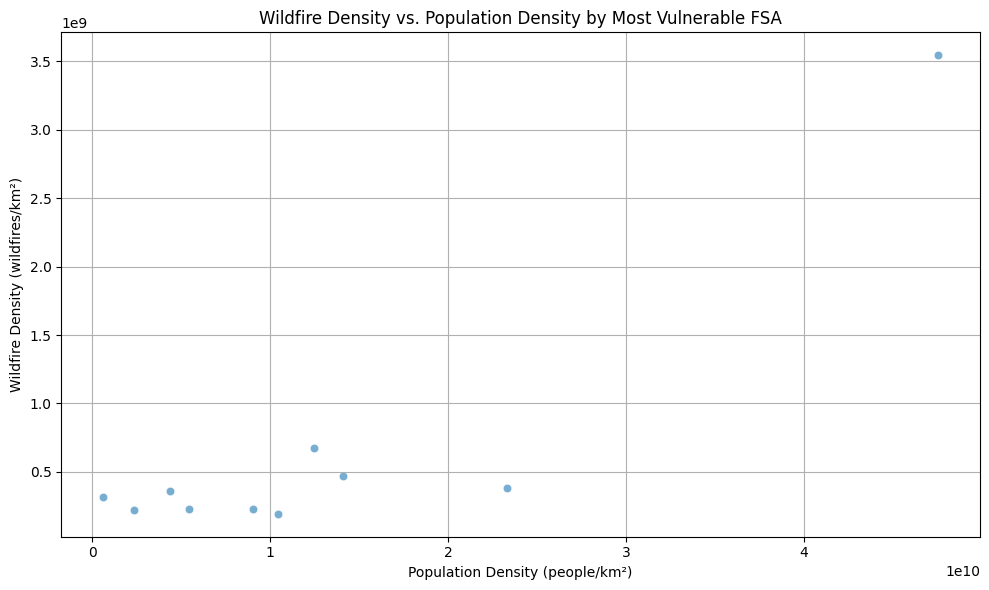

In [ ]:
top_vulnerable_fsas['area_sq_km'] = top_vulnerable_fsas['geometry'].area / 10**6

# Calculate population density (people per square kilometer) and wildfire density (wildfires per square kilometer)
top_vulnerable_fsas['population_density'] = top_vulnerable_fsas['Population 2021'] / top_vulnerable_fsas['area_sq_km']
top_vulnerable_fsas['wildfire_density'] = top_vulnerable_fsas['wildfire_count'] / top_vulnerable_fsas['area_sq_km']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_vulnerable_fsas, x='population_density', y='wildfire_density', alpha=0.6)
plt.title('Wildfire Density vs. Population Density by Most Vulnerable FSA')
plt.xlabel('Population Density (people/km²)')
plt.ylabel('Wildfire Density (wildfires/km²)')
plt.grid(True)
plt.tight_layout()
plt.show()

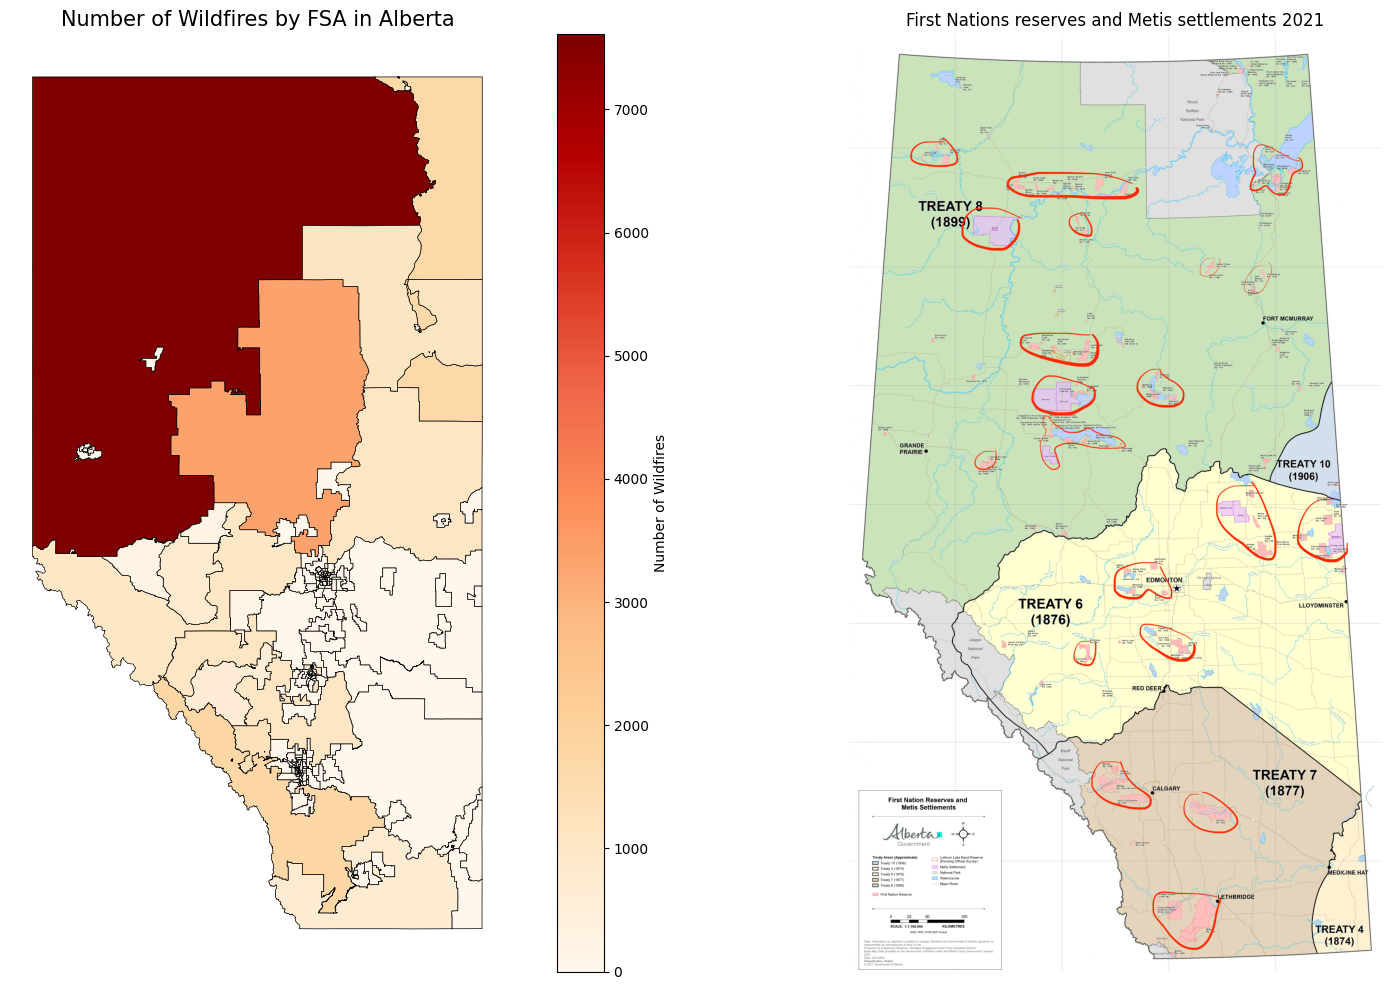

In [ ]:
from matplotlib import gridspec
from IPython.display import Image


fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax0 = plt.subplot(gs[0])
fsa_boundaries_with_counts.plot(column='wildfire_count', ax=ax0, legend=True,
                                legend_kwds={'label': "Number of Wildfires"},
                                cmap='OrRd', edgecolor='black', linewidth=0.5)
ax0.set_title('Number of Wildfires by FSA in Alberta', fontsize=15)
ax0.set_axis_off()

ax1 = plt.subplot(gs[1])
img = plt.imread('/content/drive/MyDrive/cxc_data/first-nations-reserves-and-metis-settlements-map-2021.jpg')
ax1.imshow(img)
ax1.axis('off')
ax1.set_title('First Nations reserves and Metis settlements 2021')

plt.tight_layout()
plt.show()
